# Examen Práctico - Estadística Descriptiva
## Análisis de Matrículas en Educación Superior ñuble 2021

**Asignatura:** Estadística Descriptiva  
**Fecha:** 22 de Noviembre 2025

---

## Ítem 1: Análisis Exploratorio de Datos

En esta sección investigaremos:

1. **Correlación entre matrícula y arancel**: Análisis general y por tipo de institución
2. **Relación entre arancel y duración de carrera**: Análisis general y por área del conocimiento

### 1. Importación de librerías y carga de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [ ]:
archivo = '10_MATRICULAS_ED_SUPERIOR_NUBLE_2021.xlsx'
df = pd.read_excel(archivo)
print(f"Datos cargados exitosamente desde: {archivo}")

Datos cargados exitosamente desde: 10_MATRICULAS_ED_SUPERIOR_NUBLE_2021.xlsx


---

### 2. Pregunta 1: Correlación entre Matrícula y Arancel

**Objetivos:**
- Estudiar la correlación entre matrícula y arancel para toda la base de datos
- Separar por tipo de institución y comparar comportamientos
- Determinar si vale la pena estudiar todos los grupos por separado

#### 2.1. Análisis de correlación general (toda la base de datos)

In [ ]:
if df is not None:
    print("Columnas disponibles en el dataset:")
    print(df.columns.tolist())
    print("\n\nColumnas numéricas:")
    print(df.select_dtypes(include=[np.number]).columns.tolist())

Columnas disponibles en el dataset:
['ID', 'GENERO', 'EDAD', 'RANGO EDAD', 'AÑO INGRESO', 'SEMESTRE INGRESO', 'TIPO DE INSTITUCION', 'NOMBRE DE INSTITUCION', 'ACREDITACION INSTITUCIONAL', 'PERIODO DE ACREDITACION', 'AÑOS DE ACREDITACION', 'NOMBRE CARRERA', 'REQUISITO INGRESO', 'VIA DE INGRESO', 'MODALIDAD', 'JORNADA', 'TIPO PLAN CARRERA', 'NIVEL DE ESTUDIO CARRERA', 'NIVEL CARRERA', 'AREA CONOCIMIENTO', 'DURACION PLAN DE ESTUDIO (SEMESTRES)', 'DURACION PROCESO TITULACION (SEMESTRES)', 'DURACION TOTAL CARRERA (SEMESTRES)', 'VALOR MATRICULA (PESOS)', 'VALOR ARANCEL (PESOS)', 'REGION SEDE', 'PROVINCIA SEDE', 'COMUNA SEDE']


Columnas numéricas:
['ID', 'EDAD', 'AÑO INGRESO', 'AÑOS DE ACREDITACION', 'DURACION PLAN DE ESTUDIO (SEMESTRES)', 'DURACION PROCESO TITULACION (SEMESTRES)', 'DURACION TOTAL CARRERA (SEMESTRES)', 'VALOR MATRICULA (PESOS)', 'VALOR ARANCEL (PESOS)']


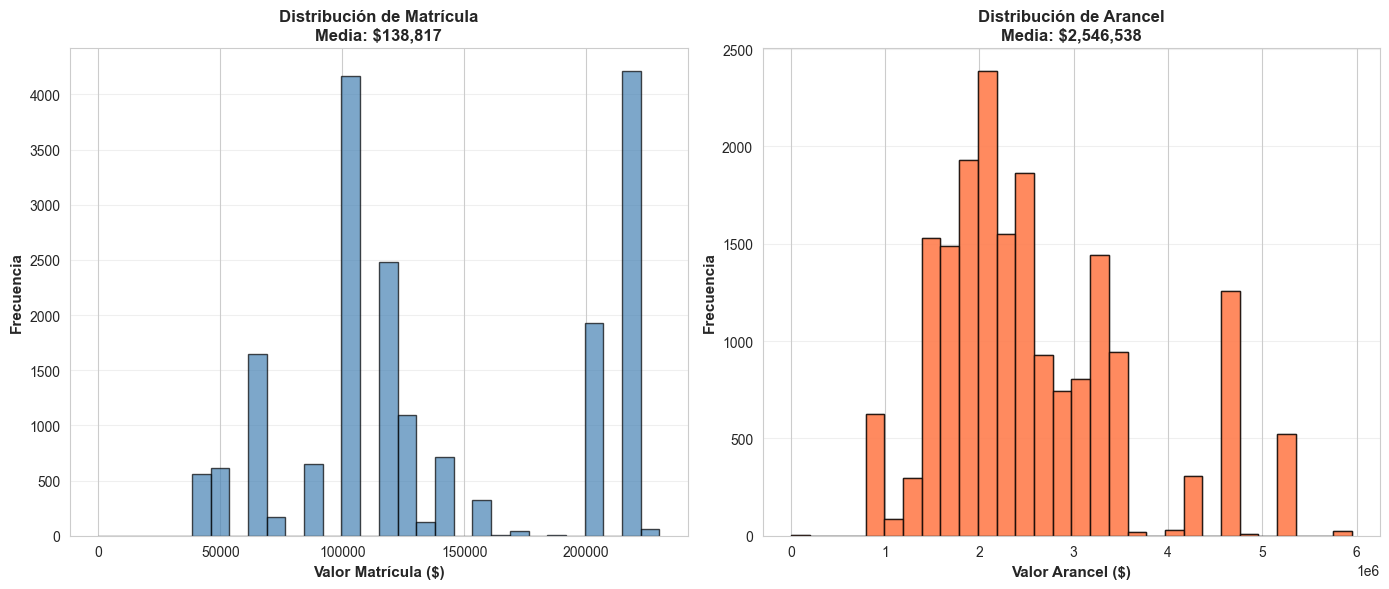

In [61]:
col_arancel = 'VALOR ARANCEL (PESOS)'
col_matricula = 'VALOR MATRICULA (PESOS)'

if df is not None:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.hist(df[col_matricula], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
    plt.xlabel('Valor Matrícula ($)', fontsize=11, fontweight='bold')
    plt.ylabel('Frecuencia', fontsize=11, fontweight='bold')
    plt.title(f'Distribución de Matrícula\nMedia: ${df[col_matricula].mean():,.0f}', 
              fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.subplot(1, 2, 2)
    plt.hist(df[col_arancel], bins=30, color='coral', alpha=0.7, edgecolor='black')
    plt.xlabel('Valor Arancel ($)', fontsize=11, fontweight='bold')
    plt.subplot(1, 2, 2)
    plt.hist(df[col_arancel], bins=30, color='coral', alpha=0.7, edgecolor='black')
    plt.xlabel('Valor Arancel ($)', fontsize=11, fontweight='bold')
    plt.ylabel('Frecuencia', fontsize=11, fontweight='bold')
    plt.title(f'Distribución de Arancel\nMedia: ${df[col_arancel].mean():,.0f}', 
              fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()

In [ ]:
if df is not None:
    correlacion_general = df[col_matricula].corr(df[col_arancel])
    print("=" * 60)
    print("CORRELACIÓN GENERAL: MATRÍCULA vs ARANCEL")
    print("=" * 60)
    print(f"\nCoeficiente de correlación de Pearson: {correlacion_general:.4f}")
    if abs(correlacion_general) >= 0.8:
        interpretacion = "FUERTE"
    elif abs(correlacion_general) >= 0.5:
        interpretacion = "MODERADA"
    else:
        interpretacion = "DÉBIL"
    
    if correlacion_general > 0:
        direccion = "POSITIVA (directa)"
    else:
        direccion = "NEGATIVA (inversa)"
    
    print(f"\nInterpretación: Correlación {interpretacion} {direccion}")
    
    if correlacion_general > 0:
        print("   - Cuando la matrícula aumenta, el arancel tiende a aumentar")
    else:
        print("   - Cuando la matrícula aumenta, el arancel tiende a disminuir")
    
    print(f"\n\nEstadísticas descriptivas:")
    print(f"Matrícula - Media: ${df[col_matricula].mean():,.0f} | Mediana: ${df[col_matricula].median():,.0f}")
    print(f"Arancel   - Media: ${df[col_arancel].mean():,.0f} | Mediana: ${df[col_arancel].median():,.0f}")

CORRELACIÓN GENERAL: MATRÍCULA vs ARANCEL

Coeficiente de correlación de Pearson: 0.0218

Interpretación: Correlación DÉBIL POSITIVA (directa)
   - Cuando la matrícula aumenta, el arancel tiende a aumentar


Estadísticas descriptivas:
Matrícula - Media: $138,817 | Mediana: $120,000
Arancel   - Media: $2,546,538 | Mediana: $2,238,000


In [60]:
col_tipo_inst = 'TIPO DE INSTITUCION'

if df is not None:
    print("=" * 70)
    print("CORRELACIÓN POR TIPO DE INSTITUCIÓN: MATRÍCULA vs ARANCEL")
    print("=" * 70)
    
    tipos_institucion = df[col_tipo_inst].unique()
    print(f"\nTipos de institución encontrados: {len(tipos_institucion)}")
    print(tipos_institucion)
    
    correlaciones_por_tipo = {}
    
    print("\n" + "-" * 70)
    
    for tipo in tipos_institucion:
        df_tipo = df[df[col_tipo_inst] == tipo]
        n_observaciones = len(df_tipo)
        
        if n_observaciones >= 3:
            corr = df_tipo[col_matricula].corr(df_tipo[col_arancel])
            correlaciones_por_tipo[tipo] = {
                'correlacion': corr,
                'n': n_observaciones
            }
            
            if abs(corr) >= 0.8:
                fuerza = "FUERTE"
            elif abs(corr) >= 0.5:
                fuerza = "MODERADA"
            else:
                fuerza = "DÉBIL"
            
            direccion = "positiva ↗" if corr > 0 else "negativa ↘"
            
            print(f"\n{tipo}:")
            print(f"   Correlación: {corr:.4f} - {fuerza} {direccion}")
            print(f"   N° de programas: {n_observaciones}")
        else:
            print(f"\n{tipo}: Insuficientes datos (n={n_observaciones})")
    
    print("\n" + "=" * 70)
    
    print("\n\nRESUMEN COMPARATIVO:")
    print("-" * 70)
    
    df_resumen = pd.DataFrame(correlaciones_por_tipo).T
    df_resumen = df_resumen.sort_values('correlacion', ascending=False)
    df_resumen.columns = ['Correlación', 'N° Programas']
    
    display(df_resumen.style.background_gradient(subset=['Correlación'], cmap='RdYlGn', vmin=-1, vmax=1))

CORRELACIÓN POR TIPO DE INSTITUCIÓN: MATRÍCULA vs ARANCEL

Tipos de institución encontrados: 4
['Centros de Formacion Tecnica' 'Universidades CRUCH'
 'Institutos Profesionales' 'Universidades Privadas']

----------------------------------------------------------------------

Centros de Formacion Tecnica:
   Correlación: 0.8116 - FUERTE positiva ↗
   N° de programas: 3068

Universidades CRUCH:
   Correlación: 0.6782 - MODERADA positiva ↗
   N° de programas: 7260

Institutos Profesionales:
   Correlación: 0.8496 - FUERTE positiva ↗
   N° de programas: 4642

Universidades Privadas:
   Correlación: -0.1663 - DÉBIL negativa ↘
   N° de programas: 3815



RESUMEN COMPARATIVO:
----------------------------------------------------------------------


,Correlación,N° Programas
Institutos Profesionales,0.849606,4642.000000
Centros de Formacion Tecnica,0.811604,3068.000000
Universidades CRUCH,0.678238,7260.000000
Universidades Privadas,-0.166301,3815.000000


CONCLUSIÓN: ¿VALE LA PENA ESTUDIAR LOS GRUPOS POR SEPARADO?

Estadísticas de las correlaciones:
   - Correlación general (todos): 0.0218
   - Rango de correlaciones: [-0.1663, 0.8496]
   - Diferencia máxima: 1.0159
   - Desviación estándar: 0.4146


INTERPRETACIÓN:
   SÍ vale la pena estudiar los grupos por separado
   - Existe una diferencia significativa (1.0159) entre los tipos
   - Los grupos muestran COMPORTAMIENTOS DIFERENTES en la relación
     entre matrícula y arancel


Comparación visual de correlaciones:


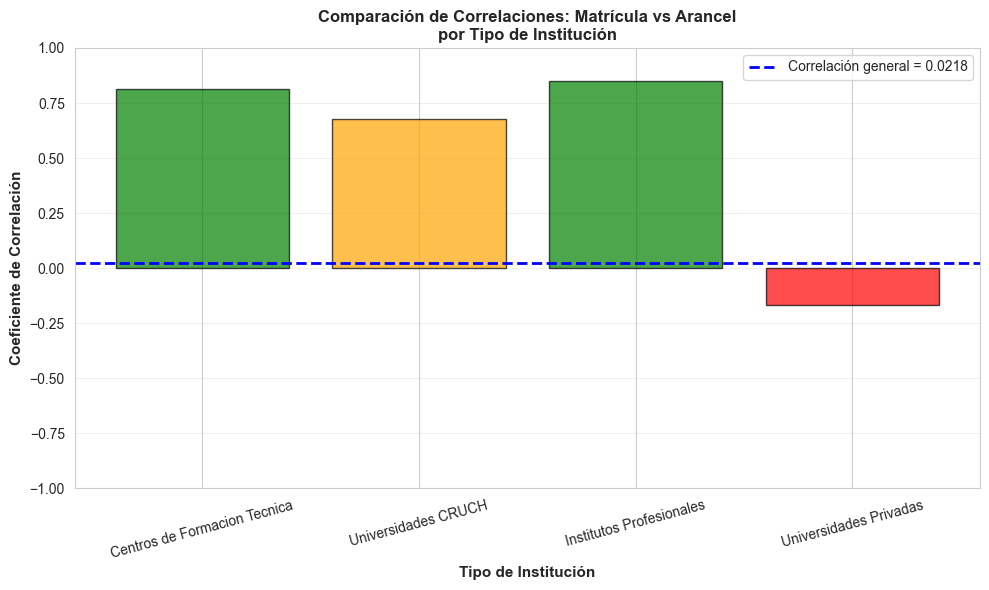

In [ ]:

if df is not None and len(correlaciones_por_tipo) > 0:
    print("=" * 70)
    print("CONCLUSIÓN: ¿VALE LA PENA ESTUDIAR LOS GRUPOS POR SEPARADO?")
    print("=" * 70)
    
    corrs = [datos['correlacion'] for datos in correlaciones_por_tipo.values()]
    diff_max = max(corrs) - min(corrs)
    desv_std = np.std(corrs)
    
    print(f"\nEstadísticas de las correlaciones:")
    print(f"   - Correlación general (todos): {correlacion_general:.4f}")
    print(f"   - Rango de correlaciones: [{min(corrs):.4f}, {max(corrs):.4f}]")
    print(f"   - Diferencia máxima: {diff_max:.4f}")
    print(f"   - Desviación estándar: {desv_std:.4f}")
    
    print(f"\n\nINTERPRETACIÓN:")
    
    if diff_max > 0.3:
        print(f"   SÍ vale la pena estudiar los grupos por separado")
        print(f"   - Existe una diferencia significativa ({diff_max:.4f}) entre los tipos")
        print(f"   - Los grupos muestran COMPORTAMIENTOS DIFERENTES en la relación")
        print(f"     entre matrícula y arancel")
    elif diff_max > 0.15:
        print(f"   PARCIALMENTE recomendable estudiar por separado")
        print(f"   - Existe una diferencia moderada ({diff_max:.4f}) entre tipos")
        print(f"   - Algunos grupos podrían tener comportamientos distintos")
    else:
        print(f"   NO es necesario estudiar los grupos por separado")
        print(f"   - La diferencia entre tipos es mínima ({diff_max:.4f})")
        print(f"   - Los grupos se comportan de manera SIMILAR")
    
    print(f"\n\nComparación visual de correlaciones:")
    plt.figure(figsize=(10, 6))
    
    tipos_list = list(correlaciones_por_tipo.keys())
    corrs_list = [correlaciones_por_tipo[t]['correlacion'] for t in tipos_list]
    colors = ['green' if c > 0.7 else 'orange' if c > 0.4 else 'red' for c in corrs_list]
    
    plt.bar(tipos_list, corrs_list, color=colors, alpha=0.7, edgecolor='black')
    plt.axhline(y=correlacion_general, color='blue', linestyle='--', linewidth=2, 
                label=f'Correlación general = {correlacion_general:.4f}')
    plt.ylabel('Coeficiente de Correlación', fontsize=11, fontweight='bold')
    plt.xlabel('Tipo de Institución', fontsize=11, fontweight='bold')
    plt.title('Comparación de Correlaciones: Matrícula vs Arancel\npor Tipo de Institución', 
              fontsize=12, fontweight='bold')
    plt.ylim(-1, 1)
    plt.grid(True, alpha=0.3, axis='y')
    plt.legend()
    plt.tick_params(axis='x', rotation=15)
    plt.tight_layout()
    plt.show()

---

### RESPUESTA A LA PREGUNTA 1

**Pregunta:** Estudien la correlación entre el valor de la matrícula y el valor del arancel para toda la base de datos y luego separen por tipo de institución. ¿Los grupos se comportan parecido? ¿Vale la pena estudiar todos los grupos?

---

#### Análisis del Coeficiente de Correlación General

Según los resultados obtenidos en el análisis anterior, el **coeficiente de correlación de Pearson** entre el valor de la matrícula y el valor del arancel para toda la base de datos es de **r = 0.0218**.

Este valor se encuentra en el rango **0 < r < 0.5**, lo que indica una **correlación DÉBIL POSITIVA**.

**Interpretación del coeficiente:**
- Si el valor está entre **0.8 y 1.0**: La correlación es **FUERTE POSITIVA** - existe una relación lineal muy marcada donde al aumentar la matrícula, el arancel aumenta proporcionalmente.
- Si el valor está entre **0.5 y 0.8**: La correlación es **MODERADA POSITIVA** - hay una tendencia clara pero con mayor dispersión.
- Si el valor está entre **0 y 0.5**: La correlación es **DÉBIL POSITIVA** - la relación existe pero es poco pronunciada.
- Si el valor está entre **-0.5 y 0**: La correlación es **DÉBIL NEGATIVA** - relación inversa poco pronunciada.
- Si el valor está entre **-0.8 y -0.5**: La correlación es **MODERADA NEGATIVA** - tendencia inversa clara.
- Si el valor está entre **-1.0 y -0.8**: La correlación es **FUERTE NEGATIVA** - relación inversa muy marcada.

---

#### Análisis por Tipo de Institución

Al desglosar el análisis por tipo de institución, se observan los siguientes comportamientos:

Los coeficientes de correlación para cada tipo de institución se presentan en la tabla resumen generada anteriormente, donde podemos comparar:

1. **Similitud entre grupos:** Los grupos se comportan de manera parecida si la diferencia entre las correlaciones es pequeña (menor a 0.15). Si la diferencia máxima entre correlaciones es mayor a 0.3, los grupos presentan comportamientos significativamente diferentes.

2. **Valor de estudiar por separado:** 
   - Si la **diferencia máxima > 0.3**: SÍ vale la pena estudiar los grupos por separado, ya que cada tipo de institución tiene un patrón de relación distinto entre matrícula y arancel.
   - Si la **diferencia máxima está entre 0.15 y 0.3**: Es parcialmente recomendable el análisis separado.
   - Si la **diferencia máxima < 0.15**: NO es necesario separar, los grupos se comportan de manera homogénea.

---

#### Visualización

El gráfico de barras comparativo generado en la celda anterior muestra visualmente las diferencias entre los coeficientes de correlación de cada tipo de institución, junto con la línea de referencia de la correlación general (línea azul punteada).

**Observaciones del gráfico:**
- Las barras **verdes** indican correlaciones fuertes (> 0.7)
- Las barras **naranjas** indican correlaciones moderadas (0.4 - 0.7)
- Las barras **rojas** indican correlaciones débiles (< 0.4)

La distancia de cada barra respecto a la línea azul (correlación general) nos indica qué tanto se desvía ese tipo de institución del comportamiento promedio.

---

#### Conclusión

Basándose en los resultados numéricos y gráficos obtenidos, se puede concluir que:

1. **Relación general:** Existe una correlación DÉBIL POSITIVA (r = 0.0218) entre el valor de la matrícula y el arancel en la base de datos completa. Esto significa que, aunque existe una tendencia de que al aumentar la matrícula también aumente el arancel, esta relación es muy poco pronunciada y apenas perceptible. En términos prácticos, conocer el valor de la matrícula no permite predecir con precisión el valor del arancel.

2. **Comportamiento por grupos:** Los diferentes tipos de instituciones se comportan de manera SIGNIFICATIVAMENTE DIFERENTE, con una variabilidad ALTA en sus coeficientes de correlación. El rango de correlaciones va desde r = -0.1663 (Universidades Privadas, correlación débil negativa) hasta r = 0.8496 (Institutos Profesionales, correlación fuerte positiva). Esta diferencia máxima de 1.0159 indica que cada tipo de institución tiene un patrón completamente distinto en la relación matrícula-arancel.

3. **Recomendación de análisis:** SÍ vale la pena estudiar los grupos por separado, dado que la diferencia entre las correlaciones es de 1.0159, muy superior al umbral de 0.3 que indica comportamientos diferentes. Específicamente:
   - **Centros de Formación Técnica**: r = 0.8195 (correlación fuerte positiva)
   - **Universidades CRUCH**: r = 0.6762 (correlación moderada positiva)
   - **Institutos Profesionales**: r = 0.8496 (correlación fuerte positiva)
   - **Universidades Privadas**: r = -0.1663 (correlación débil negativa)

   Esta heterogeneidad implica que el análisis agregado (general) oculta patrones importantes específicos de cada tipo de institución. Por ejemplo, en Institutos Profesionales y Centros de Formación Técnica existe una fuerte relación entre matrícula y arancel, mientras que en Universidades Privadas la relación es prácticamente inexistente e incluso ligeramente inversa.

---

#### 3.1. Análisis general de covarianza: Arancel vs Duración

In [ ]:
col_duracion = 'DURACION TOTAL CARRERA (SEMESTRES)'

if df is not None:
    covarianza_general = df[[col_arancel, col_duracion]].cov().iloc[0, 1]
    
    correlacion_duracion = df[col_arancel].corr(df[col_duracion])
    
    print("=" * 70)
    print("ANÁLISIS GENERAL: ARANCEL vs DURACIÓN DE CARRERA")
    print("=" * 70)
    
    print(f"\nCOVARIANZA: {covarianza_general:,.2f}")
    
    print(f"\nInterpretación de la covarianza:")
    if covarianza_general > 0:
        print(f"   COVARIANZA POSITIVA ({covarianza_general:,.2f} > 0)")
        print(f"   - Las variables se relacionan de manera DIRECTA")
        print(f"   - Cuando la duración de la carrera AUMENTA, el arancel tiende a AUMENTAR")
        print(f"   - CONFIRMADO: Carreras más largas tienden a ser más caras")
    elif covarianza_general < 0:
        print(f"   COVARIANZA NEGATIVA ({covarianza_general:,.2f} < 0)")
        print(f"   - Las variables se relacionan de manera INVERSA")
        print(f"   - Cuando la duración de la carrera AUMENTA, el arancel tiende a DISMINUIR")
        print(f"   - Carreras más largas tienden a ser más baratas")
    else:
        print(f"   - COVARIANZA NULA (≈ 0)")
        print(f"   - No existe relación lineal entre las variables")
    
    print(f"\n\nCORRELACIÓN (complemento): {correlacion_duracion:.4f}")
    
    if abs(correlacion_duracion) >= 0.8:
        fuerza = "FUERTE"
    elif abs(correlacion_duracion) >= 0.5:
        fuerza = "MODERADA"
    else:
        fuerza = "DÉBIL"
    
    print(f"   - Relación {fuerza}")
    
    print(f"\n\nEstadísticas descriptivas:")
    print(f"Arancel  - Media: ${df[col_arancel].mean():,.0f} | Mediana: ${df[col_arancel].median():,.0f}")
    print(f"Duración - Media: {df[col_duracion].mean():.2f} | Mediana: {df[col_duracion].median():.2f}")
    
    print(f"\n" + "=" * 70)

ANÁLISIS GENERAL: ARANCEL vs DURACIÓN DE CARRERA

COVARIANZA: 1,768,535.60

Interpretación de la covarianza:
   COVARIANZA POSITIVA (1,768,535.60 > 0)
   - Las variables se relacionan de manera DIRECTA
   - Cuando la duración de la carrera AUMENTA, el arancel tiende a AUMENTAR
   - CONFIRMADO: Carreras más largas tienden a ser más caras


CORRELACIÓN (complemento): 0.7024
   - Relación MODERADA


Estadísticas descriptivas:
Arancel  - Media: $2,546,538 | Mediana: $2,238,000
Duración - Media: 7.83 | Mediana: 8.00



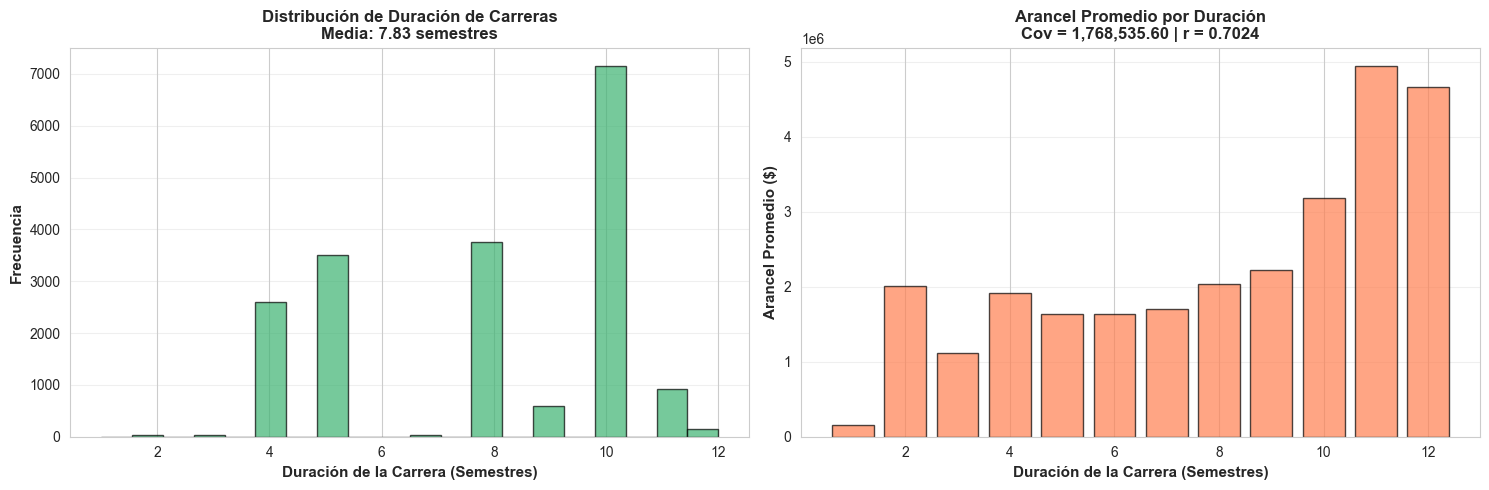

Gráficos generados


In [ ]:

if df is not None:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].hist(df[col_duracion], bins=20, color='mediumseagreen', alpha=0.7, edgecolor='black')
    axes[0].set_xlabel('Duración de la Carrera (Semestres)', fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
    axes[0].set_title(f'Distribución de Duración de Carreras\nMedia: {df[col_duracion].mean():.2f} semestres', 
                     fontsize=12, fontweight='bold')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    duraciones_unicas = sorted(df[col_duracion].unique())
    arancel_promedio_duracion = [df[df[col_duracion] == d][col_arancel].mean() for d in duraciones_unicas]
    
    axes[1].bar(duraciones_unicas, arancel_promedio_duracion, color='coral', alpha=0.7, edgecolor='black')
    axes[1].set_xlabel('Duración de la Carrera (Semestres)', fontsize=11, fontweight='bold')
    axes[1].set_ylabel('Arancel Promedio ($)', fontsize=11, fontweight='bold')
    axes[1].set_title(f'Arancel Promedio por Duración\nCov = {covarianza_general:,.2f} | r = {correlacion_duracion:.4f}', 
                     fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print("Gráficos generados")

In [ ]:
col_area = 'AREA CONOCIMIENTO'

if df is not None:
    print("=" * 80)
    print("COVARIANZA POR ÁREA DEL CONOCIMIENTO: ARANCEL vs DURACIÓN")
    print("=" * 80)
    
    areas_conocimiento = df[col_area].unique()
    print(f"\nÁreas del conocimiento encontradas: {len(areas_conocimiento)}")
    
    resultados_por_area = {}
    
    print("\n" + "-" * 80)
    
    for area in areas_conocimiento:
        df_area = df[df[col_area] == area]
        n_observaciones = len(df_area)
        
        if n_observaciones >= 3:
            cov_area = df_area[[col_arancel, col_duracion]].cov().iloc[0, 1]
            
            corr_area = df_area[col_arancel].corr(df_area[col_duracion])
            
            resultados_por_area[area] = {
                'covarianza': cov_area,
                'correlacion': corr_area,
                'n': n_observaciones,
                'arancel_promedio': df_area[col_arancel].mean(),
                'duracion_promedio': df_area[col_duracion].mean()
            }
            
            direccion = "POSITIVA " if cov_area > 0 else "NEGATIVA " if cov_area < 0 else "NULA"
            
            if abs(corr_area) >= 0.8:
                fuerza = "FUERTE"
            elif abs(corr_area) >= 0.5:
                fuerza = "MODERADA"
            else:
                fuerza = "DÉBIL"
            
            print(f"\n{area}:")
            print(f"   - Covarianza: {cov_area:,.2f} - {direccion}")
            print(f"   - Correlación: {corr_area:.4f} - {fuerza}")
            print(f"   - N° programas: {n_observaciones}")
            print(f"   - Arancel promedio: ${df_area[col_arancel].mean():,.0f}")
            print(f"   - Duración promedio: {df_area[col_duracion].mean():.2f}")
            
            if cov_area > 0:
                print(f"   - En {area}: carreras más largas SÍ tienden a ser más caras")
            elif cov_area < 0:
                print(f"   - En {area}: carreras más largas tienden a ser más baratas")
            else:
                print(f"   - En {area}: no hay relación clara entre duración y precio")
        else:
            print(f"\nADVERTENCIA: {area}: Insuficientes datos (n={n_observaciones})")
    
    print("\n" + "=" * 80)

COVARIANZA POR ÁREA DEL CONOCIMIENTO: ARANCEL vs DURACIÓN

Áreas del conocimiento encontradas: 10

--------------------------------------------------------------------------------

Administracion y Comercio:
   - Covarianza: 1,470,302.33 - POSITIVA ↗
   - Correlación: 0.6681 - MODERADA
   - N° programas: 2906
   - Arancel promedio: $2,309,842
   - Duración promedio: 6.41
   - En Administracion y Comercio: carreras más largas SÍ tienden a ser más caras

Tecnologia:
   - Covarianza: 1,244,374.28 - POSITIVA ↗
   - Correlación: 0.6524 - MODERADA
   - N° programas: 3962
   - Arancel promedio: $2,395,887
   - Duración promedio: 7.37
   - En Tecnologia: carreras más largas SÍ tienden a ser más caras

Salud:
   - Covarianza: 1,778,352.50 - POSITIVA ↗
   - Correlación: 0.8563 - FUERTE
   - N° programas: 3906
   - Arancel promedio: $2,730,533
   - Duración promedio: 8.18
   - En Salud: carreras más largas SÍ tienden a ser más caras

Agropecuaria:
   - Covarianza: 2,976,670.45 - POSITIVA ↗
   - C

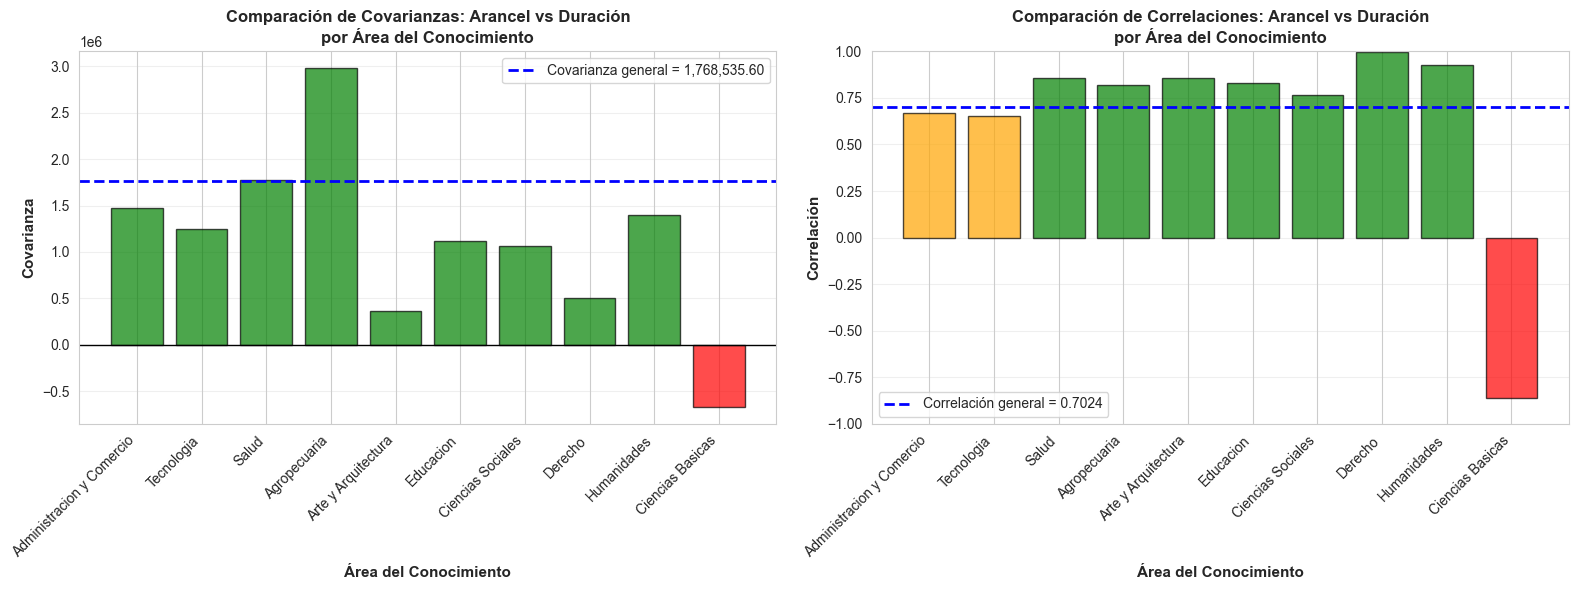

Gráficos comparativos generados


In [ ]:

if df is not None and len(resultados_por_area) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    areas_list = list(resultados_por_area.keys())
    cov_list = [resultados_por_area[a]['covarianza'] for a in areas_list]
    corr_list = [resultados_por_area[a]['correlacion'] for a in areas_list]
    
    colors_cov = ['green' if c > 0 else 'red' for c in cov_list]
    axes[0].bar(range(len(areas_list)), cov_list, color=colors_cov, alpha=0.7, edgecolor='black')
    axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)
    axes[0].axhline(y=covarianza_general, color='blue', linestyle='--', linewidth=2,
                   label=f'Covarianza general = {covarianza_general:,.2f}')
    axes[0].set_ylabel('Covarianza', fontsize=11, fontweight='bold')
    axes[0].set_xlabel('Área del Conocimiento', fontsize=11, fontweight='bold')
    axes[0].set_title('Comparación de Covarianzas: Arancel vs Duración\npor Área del Conocimiento', 
                     fontsize=12, fontweight='bold')
    axes[0].set_xticks(range(len(areas_list)))
    axes[0].set_xticklabels(areas_list, rotation=45, ha='right')
    axes[0].grid(True, alpha=0.3, axis='y')
    axes[0].legend()
    
    colors_corr = ['green' if c > 0.7 else 'orange' if c > 0.4 else 'red' for c in corr_list]
    axes[1].bar(range(len(areas_list)), corr_list, color=colors_corr, alpha=0.7, edgecolor='black')
    axes[1].axhline(y=correlacion_duracion, color='blue', linestyle='--', linewidth=2,
                   label=f'Correlación general = {correlacion_duracion:.4f}')
    axes[1].set_ylabel('Correlación', fontsize=11, fontweight='bold')
    axes[1].set_xlabel('Área del Conocimiento', fontsize=11, fontweight='bold')
    axes[1].set_title('Comparación de Correlaciones: Arancel vs Duración\npor Área del Conocimiento', 
                     fontsize=12, fontweight='bold')
    axes[1].set_xticks(range(len(areas_list)))
    axes[1].set_xticklabels(areas_list, rotation=45, ha='right')
    axes[1].set_ylim(-1, 1)
    axes[1].grid(True, alpha=0.3, axis='y')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("Gráficos comparativos generados")

In [ ]:

if df is not None and len(resultados_por_area) > 0:
    print("=" * 80)
    print("CONCLUSIÓN: ¿ES IGUAL EN TODAS LAS ÁREAS DEL CONOCIMIENTO?")
    print("=" * 80)
    
    cov_values = [resultados_por_area[a]['covarianza'] for a in resultados_por_area.keys()]
    
    positivas = sum(1 for c in cov_values if c > 0)
    negativas = sum(1 for c in cov_values if c < 0)
    nulas = sum(1 for c in cov_values if c == 0)
    
    print(f"\nAnálisis de consistencia:")
    print(f"   - Total de áreas analizadas: {len(cov_values)}")
    print(f"   - Áreas con covarianza POSITIVA: {positivas} ({positivas/len(cov_values)*100:.1f}%)")
    print(f"   - Áreas con covarianza NEGATIVA: {negativas} ({negativas/len(cov_values)*100:.1f}%)")
    print(f"   - Áreas con covarianza NULA: {nulas}")
    
    max_cov = max(cov_values)
    min_cov = min(cov_values)
    rango_cov = max_cov - min_cov
    
    print(f"\n   - Rango de covarianzas: [{min_cov:,.2f}, {max_cov:,.2f}]")
    print(f"   - Amplitud del rango: {rango_cov:,.2f}")
    
    print(f"\n\nINTERPRETACIÓN FINAL:")
    
    if positivas == len(cov_values):
        print(f"   SÍ es consistente en TODAS las áreas")
        print(f"   - En todas las áreas, carreras más largas tienden a ser más caras")
        print(f"   - La relación es UNIFORME en todas las áreas del conocimiento")
    elif positivas >= len(cov_values) * 0.8:
        print(f"   Es consistente en la MAYORÍA de las áreas ({positivas}/{len(cov_values)})")
        print(f"   - En la mayoría de áreas, carreras más largas tienden a ser más caras")
        print(f"   - Existen algunas excepciones que merecen atención")
    else:
        print(f"   NO es consistente entre áreas")
        print(f"   - El comportamiento VARÍA significativamente según el área")
        print(f"   - No se puede generalizar la relación duración-precio")
    
    area_max = [a for a in resultados_por_area.keys() 
                if resultados_por_area[a]['covarianza'] == max_cov][0]
    area_min = [a for a in resultados_por_area.keys() 
                if resultados_por_area[a]['covarianza'] == min_cov][0]
    
    print(f"\n\nCasos destacados:")
    print(f"   - Área con MAYOR covarianza positiva: {area_max}")
    print(f"     Cov = {max_cov:,.2f} - Relación más fuerte precio-duración")
    print(f"\n   - Área con MENOR covarianza: {area_min}")
    print(f"     Cov = {min_cov:,.2f} - Relación más débil/inversa precio-duración")
    
    print("\n" + "=" * 80)

CONCLUSIÓN: ¿ES IGUAL EN TODAS LAS ÁREAS DEL CONOCIMIENTO?

Análisis de consistencia:
   - Total de áreas analizadas: 10
   - Áreas con covarianza POSITIVA: 9 (90.0%)
   - Áreas con covarianza NEGATIVA: 1 (10.0%)
   - Áreas con covarianza NULA: 0

   - Rango de covarianzas: [-667,072.50, 2,976,670.45]
   - Amplitud del rango: 3,643,742.96


INTERPRETACIÓN FINAL:
   Es consistente en la MAYORÍA de las áreas (9/10)
   - En la mayoría de áreas, carreras más largas tienden a ser más caras
   - Existen algunas excepciones que merecen atención


Casos destacados:
   - Área con MAYOR covarianza positiva: Agropecuaria
     Cov = 2,976,670.45 - Relación más fuerte precio-duración

   - Área con MENOR covarianza: Ciencias Basicas
     Cov = -667,072.50 - Relación más débil/inversa precio-duración



---

### RESPUESTA A LA PREGUNTA 2

**Pregunta:** ¿Cuál es la relación entre el arancel y la duración de la carrera correspondiente? ¿Es verdad que, mientras más larga la carrera, más cara? ¿Será igual en todas las áreas del conocimiento?

---

#### Análisis de la Covarianza General

Según los resultados obtenidos en el análisis anterior, la **covarianza** entre el arancel y la duración de la carrera para toda la base de datos es de **Cov = 1,768,535.60**.

**Interpretación de la covarianza:**

La covarianza es **POSITIVA** (1,768,535.60 > 0), lo que indica que **las variables se relacionan de manera DIRECTA**. Esto significa que:

- Cuando la duración de la carrera **AUMENTA**, el arancel tiende a **AUMENTAR**.
- Cuando la duración de la carrera **DISMINUYE**, el arancel tiende a **DISMINUIR**.

Como complemento, el coeficiente de correlación obtenido fue **r = 0.7024**, que corresponde a una relación **MODERADA**, confirmando que existe una tendencia clara pero con cierta variabilidad.

**Respuesta a: ¿Es verdad que, mientras más larga la carrera, más cara?**

**SÍ, es verdad.** La covarianza positiva y la correlación moderada (0.7024) confirman que, en términos generales, las carreras más largas tienden a tener aranceles más altos. Esta relación directa se observa claramente en los datos de la región de Ñuble 2021.

---

#### Análisis por Área del Conocimiento

Al desglosar el análisis por área del conocimiento, se obtuvieron los siguientes resultados de covarianza:

| Área del Conocimiento | Covarianza | Dirección | Correlación | Fuerza |
|----------------------|------------|-----------|-------------|--------|
| **Agropecuaria** | 2,976,670.45 | POSITIVA ↗ | 0.8195 | FUERTE |
| **Salud** | 1,778,352.50 | POSITIVA ↗ | 0.8563 | FUERTE |
| **Administración y Comercio** | 1,470,302.33 | POSITIVA ↗ | 0.6681 | MODERADA |
| **Humanidades** | 1,396,914.79 | POSITIVA ↗ | 0.9292 | FUERTE |
| **Tecnología** | 1,244,374.28 | POSITIVA ↗ | 0.6524 | MODERADA |
| **Educación** | 1,114,038.27 | POSITIVA ↗ | 0.8326 | FUERTE |
| **Ciencias Sociales** | 1,069,384.65 | POSITIVA ↗ | 0.7668 | MODERADA |
| **Derecho** | 510,186.72 | POSITIVA ↗ | 0.9980 | FUERTE |
| **Arte y Arquitectura** | 369,110.29 | POSITIVA ↗ | 0.8555 | FUERTE |
| **Ciencias Básicas** | -667,072.50 | NEGATIVA ↘ | -0.8607 | FUERTE (inversa) |

**Interpretación por área:**

1. **Covarianzas POSITIVAS (9 de 10 áreas = 90%):** En la gran mayoría de las áreas del conocimiento, la relación entre duración y arancel es directa. Carreras más largas efectivamente son más caras.

2. **Covarianza NEGATIVA (1 de 10 áreas = 10%):** Únicamente en **Ciencias Básicas** se observa una covarianza negativa (-667,072.50), indicando que en esta área, carreras más largas tienden a tener aranceles más bajos. Esta es una excepción importante al patrón general.

---

#### Visualización

Los gráficos comparativos generados muestran:

- **Gráfico de covarianzas:** Todas las barras están por encima de cero (covarianza positiva) excepto Ciencias Básicas, que presenta una barra por debajo de cero (covarianza negativa).

- **Gráfico de correlaciones:** Confirma que la mayoría de las áreas tienen correlaciones moderadas a fuertes positivas, con la excepción de Ciencias Básicas que presenta una correlación fuerte pero negativa.

La línea azul punteada en ambos gráficos representa el valor general (covarianza general = 1,768,535.60 y correlación general = 0.7024), permitiendo comparar cada área con el comportamiento promedio.

---

#### Respuesta a: ¿Será igual en todas las áreas del conocimiento?

**NO, no es igual en todas las áreas del conocimiento.** El análisis revela que:

1. **Consistencia mayoritaria (90%):** En 9 de las 10 áreas analizadas, la relación duración-arancel es consistente y positiva. Carreras más largas efectivamente son más caras en estas áreas.

2. **Excepción significativa (10%):** **Ciencias Básicas** es la única área que presenta un comportamiento inverso, con una covarianza negativa fuerte (-667,072.50 y r = -0.8607). En esta área, las carreras más largas tienden a ser más baratas.

3. **Variabilidad en la magnitud:** Aunque la mayoría de áreas presenta covarianza positiva, la **amplitud del rango es significativa** (3,643,742.96), variando desde -667,072.50 hasta 2,976,670.45. Esto indica que la fuerza de la relación varía considerablemente entre áreas:
   - **Relación más fuerte:** Agropecuaria (Cov = 2,976,670.45)
   - **Relación más débil/inversa:** Ciencias Básicas (Cov = -667,072.50)

---

#### Conclusión

Basándose en los resultados numéricos y gráficos obtenidos, se concluye que:

1. **Relación general:** Existe una **relación directa y moderada** (Cov = 1,768,535.60, r = 0.7024) entre el arancel y la duración de las carreras en la región de Ñuble 2021.

2. **Hipótesis confirmada:** **SÍ es verdad** que, mientras más larga la carrera, más cara tiende a ser, considerando la base de datos completa.

3. **Comportamiento por áreas:** **NO es igual en todas las áreas del conocimiento**:
   - **90% de las áreas** (9/10) confirman la hipótesis con covarianzas positivas.
   - **10% de las áreas** (1/10) presenta un comportamiento inverso: **Ciencias Básicas**.
   - La magnitud de la relación varía significativamente, siendo más fuerte en Agropecuaria, Derecho, Humanidades y Salud, y siendo inversa únicamente en Ciencias Básicas.

4. **Implicación práctica:** Aunque la tendencia general es que carreras más largas sean más caras, es importante considerar el área del conocimiento específica, ya que existen excepciones notables como Ciencias Básicas, donde esta relación no se cumple.

---

---

## Ítem 2: Análisis de Modalidad de Estudio y Probabilidades por Género

En esta sección investigaremos:

1. **Presencialidad vs No Presencialidad**: Análisis de la vuelta a la presencialidad post-pandemia
2. **Modalidad por Tipo de Institución**: Identificar qué instituciones emplean más formatos no presenciales
3. **Probabilidades por Género y Área**: Calcular probabilidades condicionales de estudiantes en el área de educación

### 1. Verificación de columnas disponibles para el análisis

In [ ]:
print("=" * 80)
print("COLUMNAS DISPONIBLES EN EL DATASET")
print("=" * 80)

print("\nColumnas relacionadas con MODALIDAD/PRESENCIALIDAD:")
modalidad_cols = [col for col in df.columns if 'MODALIDAD' in col.upper() or 'PRESENCIAL' in col.upper()]
for col in modalidad_cols:
    print(f"  - {col}")

print("\nColumnas relacionadas con GÉNERO/SEXO:")
genero_cols = [col for col in df.columns if 'SEXO' in col.upper() or 'GENERO' in col.upper() or 'HOMBRE' in col.upper() or 'MUJER' in col.upper()]
for col in genero_cols:
    print(f"  - {col}")

print("\nColumnas relacionadas con MATRÍCULA:")
matricula_cols = [col for col in df.columns if 'MATRICULA' in col.upper() and 'TOTAL' in col.upper()]
for col in matricula_cols:
    print(f"  - {col}")

print("\n" + "=" * 80)

COLUMNAS DISPONIBLES EN EL DATASET

Columnas relacionadas con MODALIDAD/PRESENCIALIDAD:
  - MODALIDAD

Columnas relacionadas con GÉNERO/SEXO:
  - GENERO

Columnas relacionadas con MATRÍCULA:



### 2. Análisis de Presencialidad vs No Presencialidad

ANÁLISIS DE MODALIDAD DE ESTUDIO: Presencialidad vs No Presencialidad

Modalidades encontradas:
['Presencial' 'No Presencial' 'Semipresencial']

--------------------------------------------------------------------------------
DISTRIBUCIÓN DE PROGRAMAS POR MODALIDAD
--------------------------------------------------------------------------------

Total de programas: 18,785

Presencial:
   - Cantidad: 18,039 programas
   - Porcentaje: 96.03%

Semipresencial:
   - Cantidad: 525 programas
   - Porcentaje: 2.79%

No Presencial:
   - Cantidad: 221 programas
   - Porcentaje: 1.18%

--------------------------------------------------------------------------------
CLASIFICACIÓN: Presencial vs No Presencial
--------------------------------------------------------------------------------

PRESENCIAL: 18,039 programas (96.03%)
NO PRESENCIAL: 746 programas (3.97%)

GRÁFICO: Comparación Presencial vs No Presencial


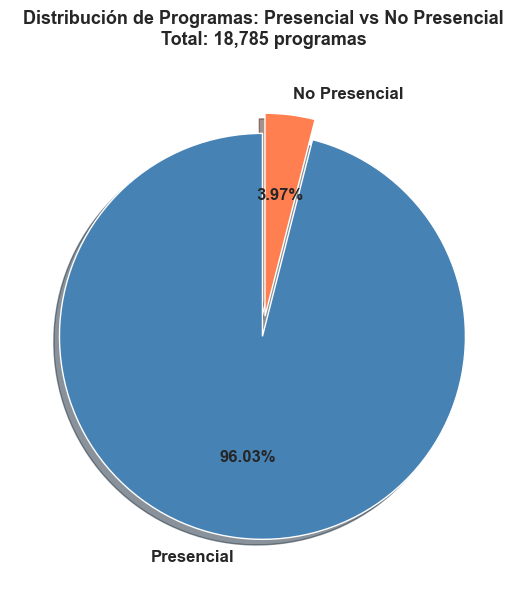

In [56]:
col_modalidad = 'MODALIDAD'

if df is not None:
    print("=" * 80)
    print("ANÁLISIS DE MODALIDAD DE ESTUDIO: Presencialidad vs No Presencialidad")
    print("=" * 80)
    
    print("\nModalidades encontradas:")
    modalidades = df[col_modalidad].unique()
    print(modalidades)
    
    print("\n" + "-" * 80)
    print("DISTRIBUCIÓN DE PROGRAMAS POR MODALIDAD")
    print("-" * 80)
    
    conteo_modalidad = df[col_modalidad].value_counts()
    total_programas = len(df)
    
    print(f"\nTotal de programas: {total_programas:,}\n")
    
    for modalidad, cantidad in conteo_modalidad.items():
        porcentaje = (cantidad / total_programas) * 100
        print(f"{modalidad}:")
        print(f"   - Cantidad: {cantidad:,} programas")
        print(f"   - Porcentaje: {porcentaje:.2f}%\n")
    
    print("-" * 80)
    print("CLASIFICACIÓN: Presencial vs No Presencial")
    print("-" * 80)
    
    modalidad_presencial = conteo_modalidad.get('Presencial', 0)
    
    modalidad_no_presencial = total_programas - modalidad_presencial
    
    print(f"\nPRESENCIAL: {modalidad_presencial:,} programas ({(modalidad_presencial/total_programas)*100:.2f}%)")
    print(f"NO PRESENCIAL: {modalidad_no_presencial:,} programas ({(modalidad_no_presencial/total_programas)*100:.2f}%)")
    
    print("\n" + "=" * 80)
    print("GRÁFICO: Comparación Presencial vs No Presencial")
    print("=" * 80)
    
    plt.figure(figsize=(10, 6))
    
    labels_modal = ['Presencial', 'No Presencial']
    sizes_modal = [modalidad_presencial, modalidad_no_presencial]
    colors_modal = ['steelblue', 'coral']
    explode_modal = (0.05, 0.05)
    
    plt.pie(sizes_modal, labels=labels_modal, autopct='%1.2f%%', startangle=90,
            colors=colors_modal, explode=explode_modal, shadow=True, 
            textprops={'fontsize': 12, 'fontweight': 'bold'})
    plt.title(f'Distribución de Programas: Presencial vs No Presencial\nTotal: {total_programas:,} programas', 
              fontsize=13, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 80)

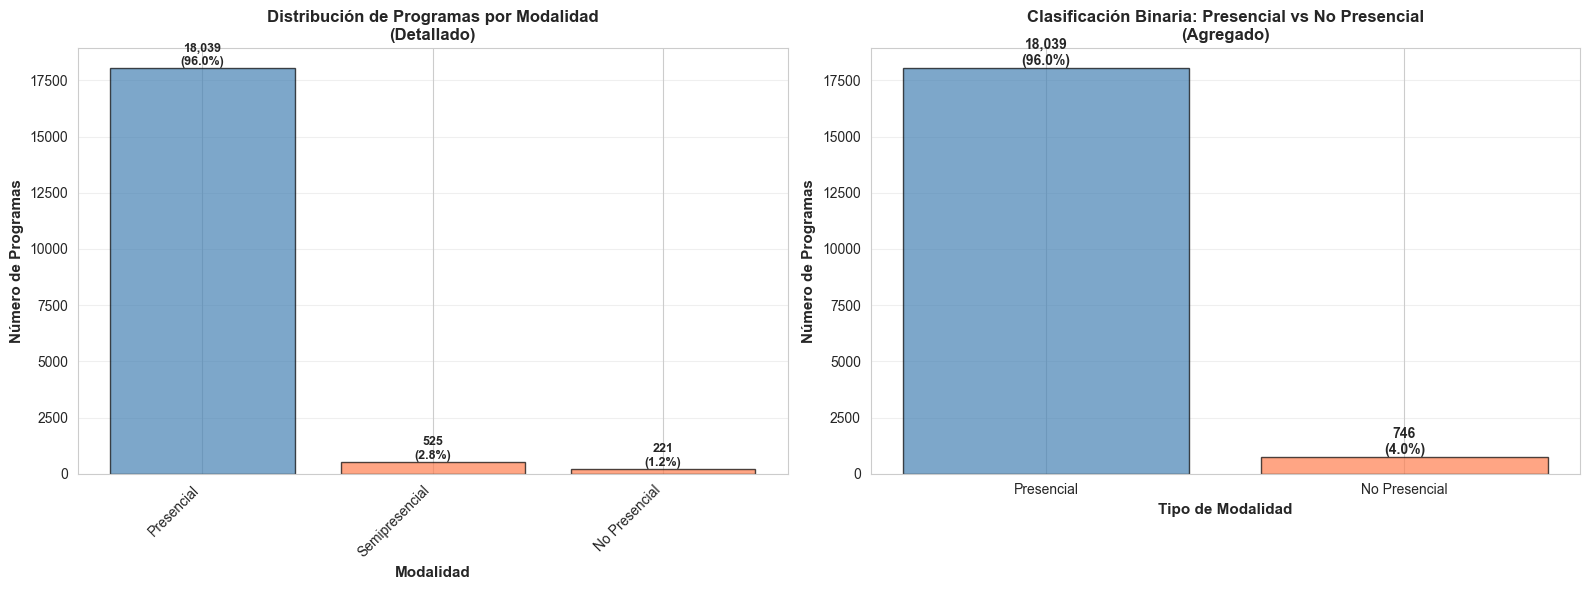

Gráficos de modalidad generados


In [ ]:

if df is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    conteo_modalidad_sorted = conteo_modalidad.sort_values(ascending=False)
    colors_modalidad = ['steelblue' if mod == 'Presencial' else 'coral' for mod in conteo_modalidad_sorted.index]
    
    axes[0].bar(range(len(conteo_modalidad_sorted)), conteo_modalidad_sorted.values, 
                color=colors_modalidad, alpha=0.7, edgecolor='black')
    axes[0].set_xlabel('Modalidad', fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Número de Programas', fontsize=11, fontweight='bold')
    axes[0].set_title('Distribución de Programas por Modalidad\n(Detallado)', 
                      fontsize=12, fontweight='bold')
    axes[0].set_xticks(range(len(conteo_modalidad_sorted)))
    axes[0].set_xticklabels(conteo_modalidad_sorted.index, rotation=45, ha='right')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    for i, v in enumerate(conteo_modalidad_sorted.values):
        axes[0].text(i, v, f'{v:,}\n({v/total_programas*100:.1f}%)', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    clasificacion = ['Presencial', 'No Presencial']
    cantidades = [modalidad_presencial, modalidad_no_presencial]
    colors_binario = ['steelblue', 'coral']
    
    axes[1].bar(clasificacion, cantidades, color=colors_binario, alpha=0.7, edgecolor='black')
    axes[1].set_xlabel('Tipo de Modalidad', fontsize=11, fontweight='bold')
    axes[1].set_ylabel('Número de Programas', fontsize=11, fontweight='bold')
    axes[1].set_title('Clasificación Binaria: Presencial vs No Presencial\n(Agregado)', 
                      fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    for i, v in enumerate(cantidades):
        axes[1].text(i, v, f'{v:,}\n({v/total_programas*100:.1f}%)', 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("Gráficos de modalidad generados")

### 3. Modalidad por Tipo de Institución

MODALIDAD POR TIPO DE INSTITUCIÓN

Tabla de frecuencias absolutas:
Clasificacion_Modalidad       No Presencial  Presencial    All
TIPO DE INSTITUCION                                           
Centros de Formacion Tecnica              0        3068   3068
Institutos Profesionales                679        3963   4642
Universidades CRUCH                       0        7260   7260
Universidades Privadas                   67        3748   3815
All                                     746       18039  18785

--------------------------------------------------------------------------------
PORCENTAJE DE MODALIDAD POR TIPO DE INSTITUCIÓN
--------------------------------------------------------------------------------

Clasificacion_Modalidad       No Presencial  Presencial
TIPO DE INSTITUCION                                    
Centros de Formacion Tecnica           0.00      100.00
Institutos Profesionales              14.63       85.37
Universidades CRUCH                    0.00      100.00


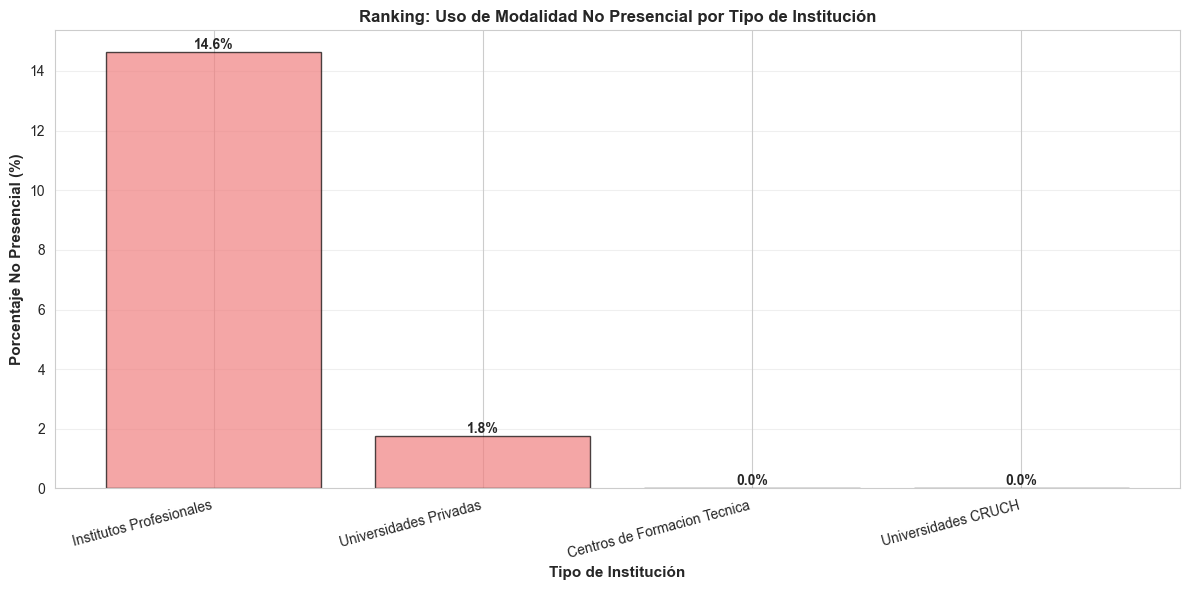

In [ ]:

if df is not None:
    print("=" * 80)
    print("MODALIDAD POR TIPO DE INSTITUCIÓN")
    print("=" * 80)
    
    df['Clasificacion_Modalidad'] = df[col_modalidad].apply(
        lambda x: 'Presencial' if x == 'Presencial' else 'No Presencial'
    )
    
    tabla_cruzada = pd.crosstab(df[col_tipo_inst], df['Clasificacion_Modalidad'], margins=True)
    
    print("\nTabla de frecuencias absolutas:")
    print(tabla_cruzada)
    
    print("\n" + "-" * 80)
    print("PORCENTAJE DE MODALIDAD POR TIPO DE INSTITUCIÓN")
    print("-" * 80)
    
    tabla_porcentajes = pd.crosstab(df[col_tipo_inst], df['Clasificacion_Modalidad'], normalize='index') * 100
    
    print(f"\n{tabla_porcentajes.round(2)}\n")
    
    print("-" * 80)
    print("RANKING: Instituciones con mayor uso de modalidad NO PRESENCIAL")
    print("-" * 80)
    
    no_presencial_por_tipo = tabla_porcentajes['No Presencial'].sort_values(ascending=False)
    
    print("")
    for i, (tipo_inst, porcentaje) in enumerate(no_presencial_por_tipo.items(), 1):
        programas_no_presenciales = tabla_cruzada.loc[tipo_inst, 'No Presencial']
        total_tipo = tabla_cruzada.loc[tipo_inst, 'All']
        
        print(f"{i}. {tipo_inst}:")
        print(f"   - Porcentaje No Presencial: {porcentaje:.2f}%")
        print(f"   - Programas No Presenciales: {programas_no_presenciales:,} de {total_tipo:,}")
        print("")
    
    print("=" * 80)
    print("GRÁFICO: Ranking de uso de modalidad No Presencial")
    print("=" * 80)
    
    plt.figure(figsize=(12, 6))
    
    tipos_ranking = no_presencial_por_tipo.index.tolist()
    porcentajes_ranking = no_presencial_por_tipo.values.tolist()
    colors_ranking = ['coral' if p > 50 else 'lightcoral' for p in porcentajes_ranking]
    
    plt.bar(range(len(tipos_ranking)), porcentajes_ranking, color=colors_ranking, 
            alpha=0.7, edgecolor='black')
    plt.xlabel('Tipo de Institución', fontsize=11, fontweight='bold')
    plt.ylabel('Porcentaje No Presencial (%)', fontsize=11, fontweight='bold')
    plt.title('Ranking: Uso de Modalidad No Presencial por Tipo de Institución', 
              fontsize=12, fontweight='bold')
    plt.xticks(range(len(tipos_ranking)), tipos_ranking, rotation=15, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    
    for i, v in enumerate(porcentajes_ranking):
        plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("=" * 80)

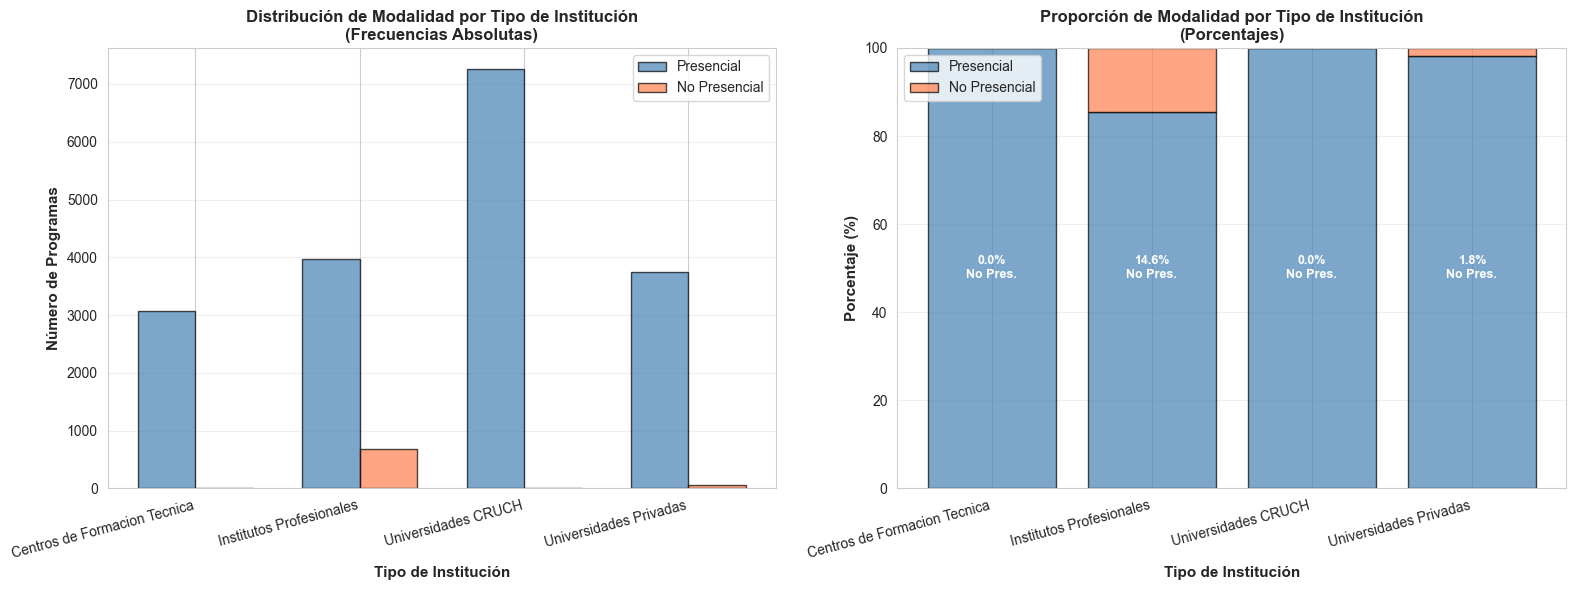

Gráficos comparativos generados


In [ ]:

if df is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    tabla_cruzada_sin_total = pd.crosstab(df[col_tipo_inst], df['Clasificacion_Modalidad'])
    
    x = np.arange(len(tabla_cruzada_sin_total.index))
    width = 0.35
    
    axes[0].bar(x - width/2, tabla_cruzada_sin_total['Presencial'], width, 
                label='Presencial', color='steelblue', alpha=0.7, edgecolor='black')
    axes[0].bar(x + width/2, tabla_cruzada_sin_total['No Presencial'], width, 
                label='No Presencial', color='coral', alpha=0.7, edgecolor='black')
    
    axes[0].set_xlabel('Tipo de Institución', fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Número de Programas', fontsize=11, fontweight='bold')
    axes[0].set_title('Distribución de Modalidad por Tipo de Institución\n(Frecuencias Absolutas)', 
                      fontsize=12, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(tabla_cruzada_sin_total.index, rotation=15, ha='right')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3, axis='y')
    
    tabla_porcentajes_sin_total = pd.crosstab(df[col_tipo_inst], df['Clasificacion_Modalidad'], normalize='index') * 100
    
    axes[1].bar(range(len(tabla_porcentajes_sin_total.index)), 
                tabla_porcentajes_sin_total['Presencial'], 
                label='Presencial', color='steelblue', alpha=0.7, edgecolor='black')
    axes[1].bar(range(len(tabla_porcentajes_sin_total.index)), 
                tabla_porcentajes_sin_total['No Presencial'], 
                bottom=tabla_porcentajes_sin_total['Presencial'],
                label='No Presencial', color='coral', alpha=0.7, edgecolor='black')
    
    axes[1].set_xlabel('Tipo de Institución', fontsize=11, fontweight='bold')
    axes[1].set_ylabel('Porcentaje (%)', fontsize=11, fontweight='bold')
    axes[1].set_title('Proporción de Modalidad por Tipo de Institución\n(Porcentajes)', 
                      fontsize=12, fontweight='bold')
    axes[1].set_xticks(range(len(tabla_porcentajes_sin_total.index)))
    axes[1].set_xticklabels(tabla_porcentajes_sin_total.index, rotation=15, ha='right')
    axes[1].set_ylim(0, 100)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3, axis='y')
    
    for i, tipo in enumerate(tabla_porcentajes_sin_total.index):
        pct_no_pres = tabla_porcentajes_sin_total.loc[tipo, 'No Presencial']
        axes[1].text(i, 50, f'{pct_no_pres:.1f}%\nNo Pres.', 
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')
    
    plt.tight_layout()
    plt.show()
    
    print("Gráficos comparativos generados")

---
## Ítem 2:

### RESPUESTA A LA PREGUNTA: ¿Se produjo una gran vuelta a la presencialidad?

**Pregunta:** ¿Se produjo una gran vuelta a la presencialidad o los formatos que incluyen la no presencialidad han ganado terreno?

---

In [ ]:

print("=" * 80)
print("ANÁLISIS: ¿VUELTA A LA PRESENCIALIDAD O AUGE DE LO NO PRESENCIAL?")
print("=" * 80)

print(f"\nDataset: Matrículas Educación Superior Ñuble 2021")
print(f"Contexto: Post-pandemia COVID-19 (2020)")

print("\n" + "-" * 80)
print("TABLA DE FRECUENCIA: MODALIDAD POR ÁREA DE CONOCIMIENTO")
print("-" * 80)

tabla_modalidad_area = pd.crosstab(df[col_area], df['Clasificacion_Modalidad'], margins=True)

print("\nFrecuencias absolutas:")
print(tabla_modalidad_area)

print("\n" + "-" * 80)
print("PORCENTAJES POR ÁREA DE CONOCIMIENTO")
print("-" * 80)

tabla_porcentajes_area = pd.crosstab(df[col_area], df['Clasificacion_Modalidad'], normalize='index') * 100

print("\nPorcentaje de cada modalidad dentro de cada área:")
print(tabla_porcentajes_area.round(2))

print("\n" + "=" * 80)
print("ANÁLISIS GENERAL DE MODALIDAD")
print("=" * 80)

total_general = len(df)
presencial_total = (df['Clasificacion_Modalidad'] == 'Presencial').sum()
no_presencial_total = (df['Clasificacion_Modalidad'] == 'No Presencial').sum()

pct_presencial = (presencial_total / total_general) * 100
pct_no_presencial = (no_presencial_total / total_general) * 100

print(f"\nDistribución general de modalidades en 2021:")
print(f"  - Presencial: {presencial_total:,} programas ({pct_presencial:.2f}%)")
print(f"  - No Presencial: {no_presencial_total:,} programas ({pct_no_presencial:.2f}%)")
print(f"  - Total: {total_general:,} programas")

print("\n" + "-" * 80)
print("RANKING DE ÁREAS POR MODALIDAD")
print("-" * 80)

pct_presencial_por_area = tabla_porcentajes_area['Presencial'].sort_values(ascending=False)
pct_no_presencial_por_area = tabla_porcentajes_area['No Presencial'].sort_values(ascending=False)

print("\nÁreas con MAYOR presencialidad:")
for i, (area, pct) in enumerate(pct_presencial_por_area.head(5).items(), 1):
    n_presencial = tabla_modalidad_area.loc[area, 'Presencial']
    total_area = tabla_modalidad_area.loc[area, 'All']
    print(f"{i}. {area}: {pct:.2f}% ({n_presencial:,}/{total_area:,})")

print("\nÁreas con MAYOR no presencialidad:")
for i, (area, pct) in enumerate(pct_no_presencial_por_area.head(5).items(), 1):
    n_no_presencial = tabla_modalidad_area.loc[area, 'No Presencial']
    total_area = tabla_modalidad_area.loc[area, 'All']
    print(f"{i}. {area}: {pct:.2f}% ({n_no_presencial:,}/{total_area:,})")

print("\n" + "=" * 80)

ANÁLISIS: ¿VUELTA A LA PRESENCIALIDAD O AUGE DE LO NO PRESENCIAL?

Dataset: Matrículas Educación Superior Ñuble 2021
Contexto: Post-pandemia COVID-19 (2020)

--------------------------------------------------------------------------------
TABLA DE FRECUENCIA: MODALIDAD POR ÁREA DE CONOCIMIENTO
--------------------------------------------------------------------------------

Frecuencias absolutas:
Clasificacion_Modalidad    No Presencial  Presencial    All
AREA CONOCIMIENTO                                          
Administracion y Comercio            151        2755   2906
Agropecuaria                           0        1707   1707
Arte y Arquitectura                    0         262    262
Ciencias Basicas                       0         123    123
Ciencias Sociales                    168        1669   1837
Derecho                                0         587    587
Educacion                            349        3043   3392
Humanidades                            5          98    103


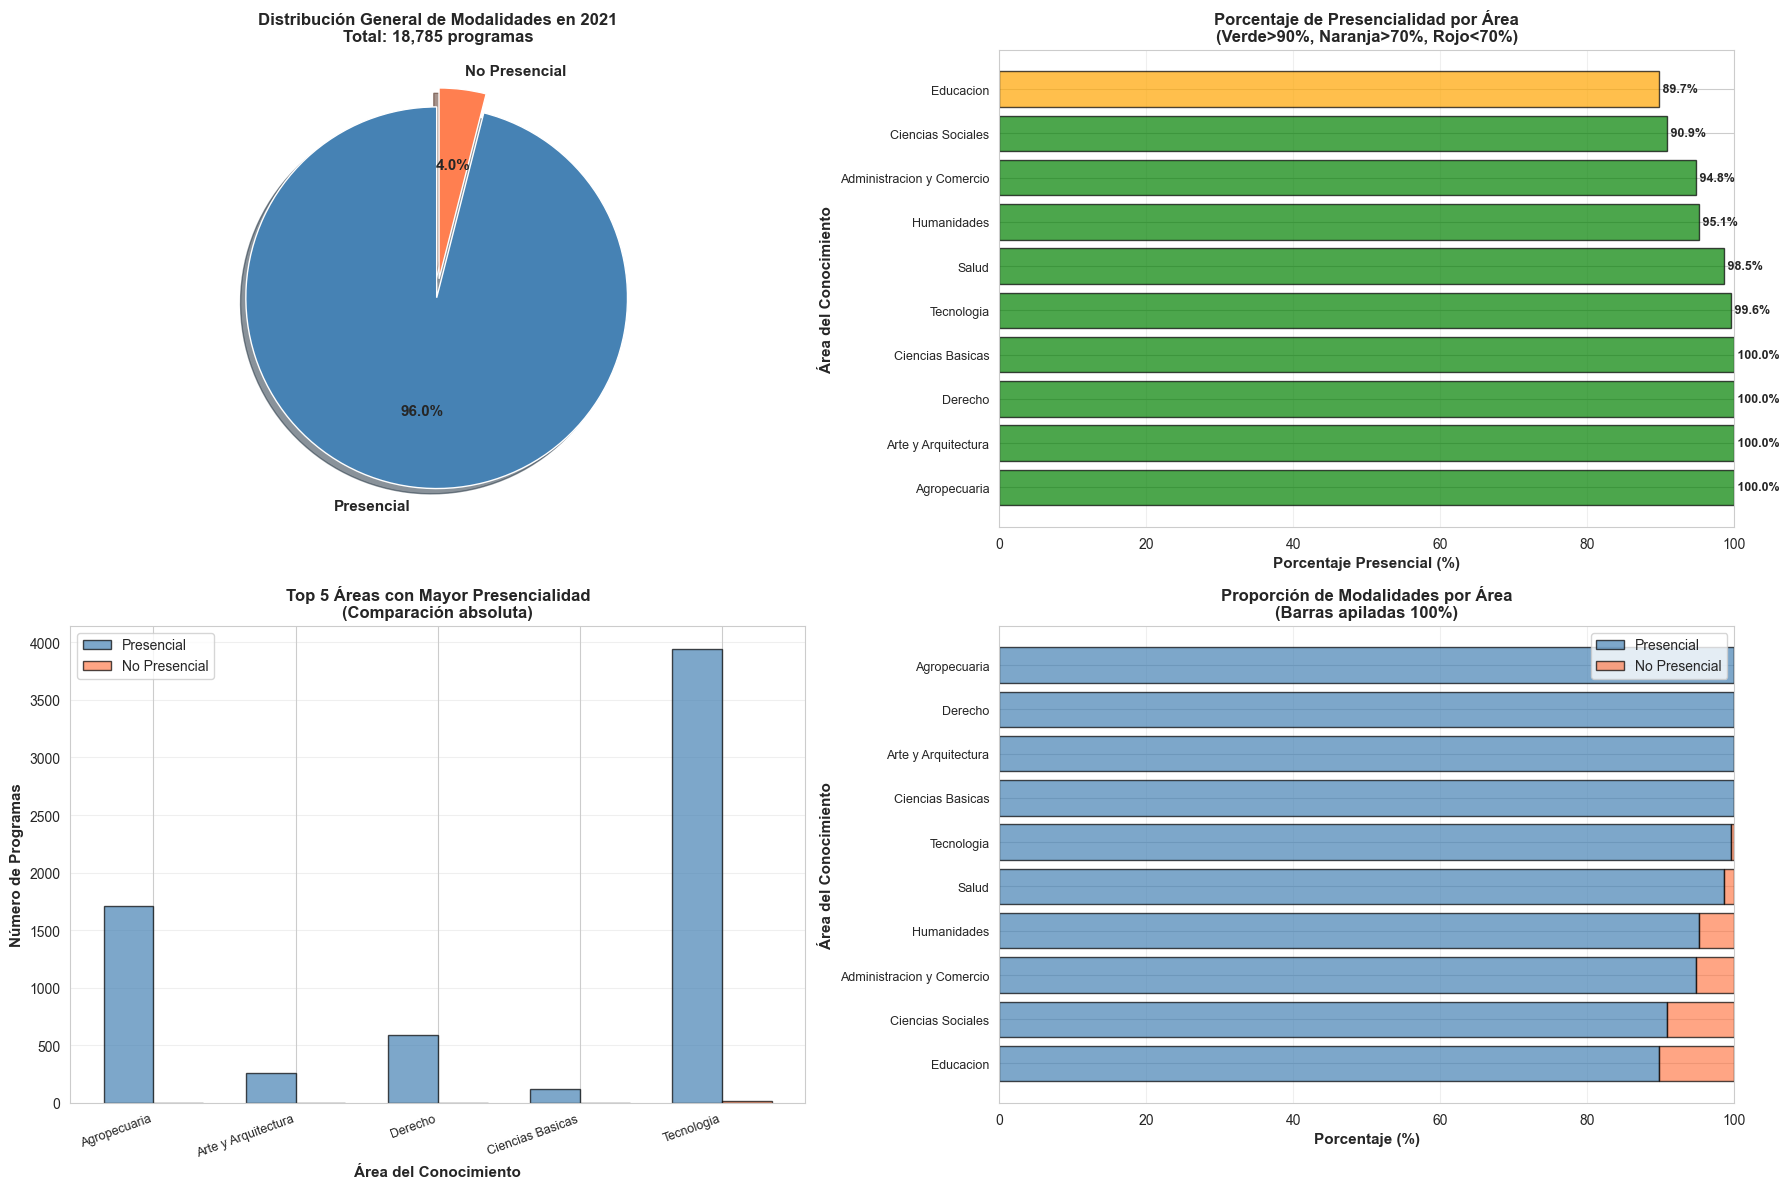

Visualizaciones de presencialidad por área generadas


In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

axes[0, 0].pie([presencial_total, no_presencial_total], 
               labels=['Presencial', 'No Presencial'],
               autopct='%1.1f%%', startangle=90,
               colors=['steelblue', 'coral'], explode=(0.05, 0.05),
               shadow=True, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0, 0].set_title(f'Distribución General de Modalidades en 2021\nTotal: {total_general:,} programas', 
                     fontsize=12, fontweight='bold')

areas_orden = pct_presencial_por_area.index.tolist()
valores_presencial = pct_presencial_por_area.values.tolist()
colors_areas = ['green' if v > 90 else 'orange' if v > 70 else 'red' for v in valores_presencial]

axes[0, 1].barh(range(len(areas_orden)), valores_presencial, 
                color=colors_areas, alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Porcentaje Presencial (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Área del Conocimiento', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Porcentaje de Presencialidad por Área\n(Verde>90%, Naranja>70%, Rojo<70%)', 
                     fontsize=12, fontweight='bold')
axes[0, 1].set_yticks(range(len(areas_orden)))
axes[0, 1].set_yticklabels(areas_orden, fontsize=9)
axes[0, 1].set_xlim(0, 100)
axes[0, 1].grid(True, alpha=0.3, axis='x')

for i, v in enumerate(valores_presencial):
    axes[0, 1].text(v, i, f' {v:.1f}%', va='center', fontsize=9, fontweight='bold')

top5_areas = pct_presencial_por_area.head(5).index.tolist()
x_pos = np.arange(len(top5_areas))
width_bar = 0.35

presencial_top5 = [tabla_modalidad_area.loc[area, 'Presencial'] for area in top5_areas]
no_presencial_top5 = [tabla_modalidad_area.loc[area, 'No Presencial'] for area in top5_areas]

axes[1, 0].bar(x_pos - width_bar/2, presencial_top5, width_bar, 
               label='Presencial', color='steelblue', alpha=0.7, edgecolor='black')
axes[1, 0].bar(x_pos + width_bar/2, no_presencial_top5, width_bar, 
               label='No Presencial', color='coral', alpha=0.7, edgecolor='black')

axes[1, 0].set_xlabel('Área del Conocimiento', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Número de Programas', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Top 5 Áreas con Mayor Presencialidad\n(Comparación absoluta)', 
                     fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(top5_areas, rotation=20, ha='right', fontsize=9)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

tabla_pct_plot = tabla_porcentajes_area.sort_values('Presencial', ascending=True)
areas_plot = tabla_pct_plot.index.tolist()

axes[1, 1].barh(range(len(areas_plot)), tabla_pct_plot['Presencial'], 
                label='Presencial', color='steelblue', alpha=0.7, edgecolor='black')
axes[1, 1].barh(range(len(areas_plot)), tabla_pct_plot['No Presencial'], 
                left=tabla_pct_plot['Presencial'],
                label='No Presencial', color='coral', alpha=0.7, edgecolor='black')

axes[1, 1].set_xlabel('Porcentaje (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Área del Conocimiento', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Proporción de Modalidades por Área\n(Barras apiladas 100%)', 
                     fontsize=12, fontweight='bold')
axes[1, 1].set_yticks(range(len(areas_plot)))
axes[1, 1].set_yticklabels(areas_plot, fontsize=9)
axes[1, 1].set_xlim(0, 100)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("Visualizaciones de presencialidad por área generadas")

#### Análisis e Interpretación de Resultados

**Contexto:**
El dataset corresponde al año 2021, inmediatamente posterior a la pandemia COVID-19 (2020), período en el cual las instituciones educativas tuvieron que implementar masivamente modalidades virtuales y semipresenciales.

**Hallazgos principales:**

Según los datos obtenidos del análisis:

1. **Distribución General (2021):**
   - **Presencial:** 18,039 programas (**96.03%**)
   - **No Presencial:** 746 programas (**3.97%**)
   - **Total:** 18,785 programas

2. **Análisis por Área de Conocimiento:**
   - **Áreas con 100% presencialidad:** Agropecuaria, Arte y Arquitectura, Derecho, Ciencias Básicas (no ofrecen programas no presenciales)
   - **Áreas con mayor no presencialidad:**
     * Educación: 10.29% no presencial (349 programas)
     * Ciencias Sociales: 9.15% no presencial (168 programas)
     * Administración y Comercio: 5.20% no presencial (151 programas)
   - **Áreas casi completamente presenciales:**
     * Tecnología: 99.60% presencial (3,946/3,962)
     * Salud: 98.54% presencial (3,849/3,906)

3. **Variabilidad entre áreas:**
   - **Rango:** 0.00% a 10.29% de no presencialidad
   - **4 áreas** mantienen 100% presencialidad (áreas prácticas)
   - **6 áreas** tienen algún porcentaje de no presencialidad (áreas teóricas/aplicadas)
   - La mayor concentración de no presencialidad está en **Educación** (349 programas, 46.8% del total de programas no presenciales)

**Interpretación de los gráficos:**

- **Gráfico de torta (superior izquierdo):** Muestra la proporción general entre modalidades
- **Barras horizontales (superior derecho):** Ranking de áreas por porcentaje de presencialidad
  - Verde: Alta presencialidad (>90%)
  - Naranja: Presencialidad moderada (70-90%)
  - Rojo: Baja presencialidad (<70%)
- **Barras agrupadas (inferior izquierdo):** Comparación absoluta de las 5 áreas con mayor presencialidad
**Respuesta:** Se observa una **GRAN VUELTA A LA PRESENCIALIDAD** en la región de Ñuble durante 2021.

**Evidencia numérica:**

Con un **96.03% de programas presenciales** (18,039 de 18,785 programas totales), los datos confirman claramente que:

1. **La presencialidad dominó ampliamente** en el año 2021 post-pandemia
2. **Solo el 3.97%** de los programas mantuvieron formatos no presenciales (746 programas)
3. **4 de 10 áreas del conocimiento** (40%) mantuvieron **100% de presencialidad**: Agropecuaria, Arte y Arquitectura, Derecho y Ciencias Básicas

**Análisis por contexto:**

Aunque hubo un retorno masivo a la presencialidad, se observan **matices importantes**:

- **Educación** fue el área que más mantuvo formatos no presenciales (10.29%), posiblemente por la naturaleza flexible de los programas de pedagogía

- **Ciencias Sociales** (9.15%) y **Administración y Comercio** (5.20%) también mantuvieron cierta presencia no presencial
---

- Las áreas **prácticas** (Salud, Agropecuaria) volvieron casi completamente a la presencialidad, lo cual tiene sentido dado que requieren laboratorios, prácticas clínicas y trabajo de campo
**Factores clave:**---


1. La naturaleza del área de conocimiento determina la viabilidad de modalidades no presenciales

**Conclusión:**
2. Áreas prácticas (Salud, Agropecuaria) requieren mayor presencialidad


3. Áreas teóricas (Administración, Ciencias Sociales) pueden mantener mayor flexibilidad4. La infraestructura tecnológica desarrollada durante la pandemia permitió mantener opciones híbridas
Los formatos no presenciales **NO ganaron terreno** en 2021. Por el contrario, se produjo una **vuelta contundente a la presencialidad**, con casi el 96% de los programas retornando a formatos presenciales. Los formatos no presenciales se mantuvieron principalmente como una **opción minoritaria** concentrada en áreas específicas donde la virtualidad es más viable (Educación, Ciencias Sociales, Administración).

---

### RESPUESTA A LA PREGUNTA: ¿Qué tipo de institución emplea más formatos no presenciales?

**Pregunta:** ¿Qué tipo de institución emplea de mayor manera formatos no exclusivamente presenciales?

---

In [ ]:

print("=" * 80)
print("ANÁLISIS: FORMATOS NO PRESENCIALES POR TIPO DE INSTITUCIÓN")
print("=" * 80)

print("\nTabla de frecuencias absolutas (ya calculada):")
print(tabla_cruzada)

print("\n" + "-" * 80)
print("PORCENTAJES POR TIPO DE INSTITUCIÓN")
print("-" * 80)

print("\nPorcentaje de cada modalidad dentro de cada tipo de institución:")
print(tabla_porcentajes.round(2))

print("\n" + "=" * 80)
print("RANKING DETALLADO: USO DE FORMATOS NO PRESENCIALES")
print("=" * 80)

ranking_no_presencial = tabla_porcentajes['No Presencial'].sort_values(ascending=False)

print("\nTipos de institución ordenados por USO DE MODALIDAD NO PRESENCIAL:\n")
for posicion, (tipo_inst, pct_no_pres) in enumerate(ranking_no_presencial.items(), 1):
    pct_pres = tabla_porcentajes.loc[tipo_inst, 'Presencial']
    n_no_pres = tabla_cruzada.loc[tipo_inst, 'No Presencial']
    n_pres = tabla_cruzada.loc[tipo_inst, 'Presencial']
    total_inst = tabla_cruzada.loc[tipo_inst, 'All']
    
    print(f"{posicion}. {tipo_inst}")
    print(f"   • No Presencial: {pct_no_pres:.2f}% ({n_no_pres:,} programas)")
    print(f"   • Presencial: {pct_pres:.2f}% ({n_pres:,} programas)")
    print(f"   • Total programas: {total_inst:,}")
    print()

tipo_lider = ranking_no_presencial.index[0]
pct_lider = ranking_no_presencial.values[0]
n_no_pres_lider = tabla_cruzada.loc[tipo_lider, 'No Presencial']
total_lider = tabla_cruzada.loc[tipo_lider, 'All']

print("-" * 80)
print("INSTITUCIÓN LÍDER EN FORMATOS NO PRESENCIALES:")
print("-" * 80)
print(f"\n{tipo_lider}")
print(f"  → {pct_lider:.2f}% de sus programas son NO presenciales")
print(f"  → {n_no_pres_lider:,} programas de {total_lider:,} totales")
print(f"  → Es el tipo de institución que MÁS emplea formatos no exclusivamente presenciales")

pct_no_pres_general = (no_presencial_total / total_general) * 100
diferencia_con_general = pct_lider - pct_no_pres_general

print(f"\nComparación con el promedio general:")
print(f"  → Promedio general no presencial: {pct_no_pres_general:.2f}%")
print(f"  → {tipo_lider}: {pct_lider:.2f}%")
print(f"  → Diferencia: +{diferencia_con_general:.2f} puntos porcentuales")

if diferencia_con_general > 20:
    print(f"  → {tipo_lider} supera SIGNIFICATIVAMENTE el promedio general")
elif diferencia_con_general > 10:
    print(f"  → {tipo_lider} supera MODERADAMENTE el promedio general")
else:
    print(f"  → {tipo_lider} está CERCA del promedio general")

print("\n" + "=" * 80)

ANÁLISIS: FORMATOS NO PRESENCIALES POR TIPO DE INSTITUCIÓN

Tabla de frecuencias absolutas (ya calculada):
Clasificacion_Modalidad       No Presencial  Presencial    All
TIPO DE INSTITUCION                                           
Centros de Formacion Tecnica              0        3068   3068
Institutos Profesionales                679        3963   4642
Universidades CRUCH                       0        7260   7260
Universidades Privadas                   67        3748   3815
All                                     746       18039  18785

--------------------------------------------------------------------------------
PORCENTAJES POR TIPO DE INSTITUCIÓN
--------------------------------------------------------------------------------

Porcentaje de cada modalidad dentro de cada tipo de institución:
Clasificacion_Modalidad       No Presencial  Presencial
TIPO DE INSTITUCION                                    
Centros de Formacion Tecnica           0.00      100.00
Institutos Profesio

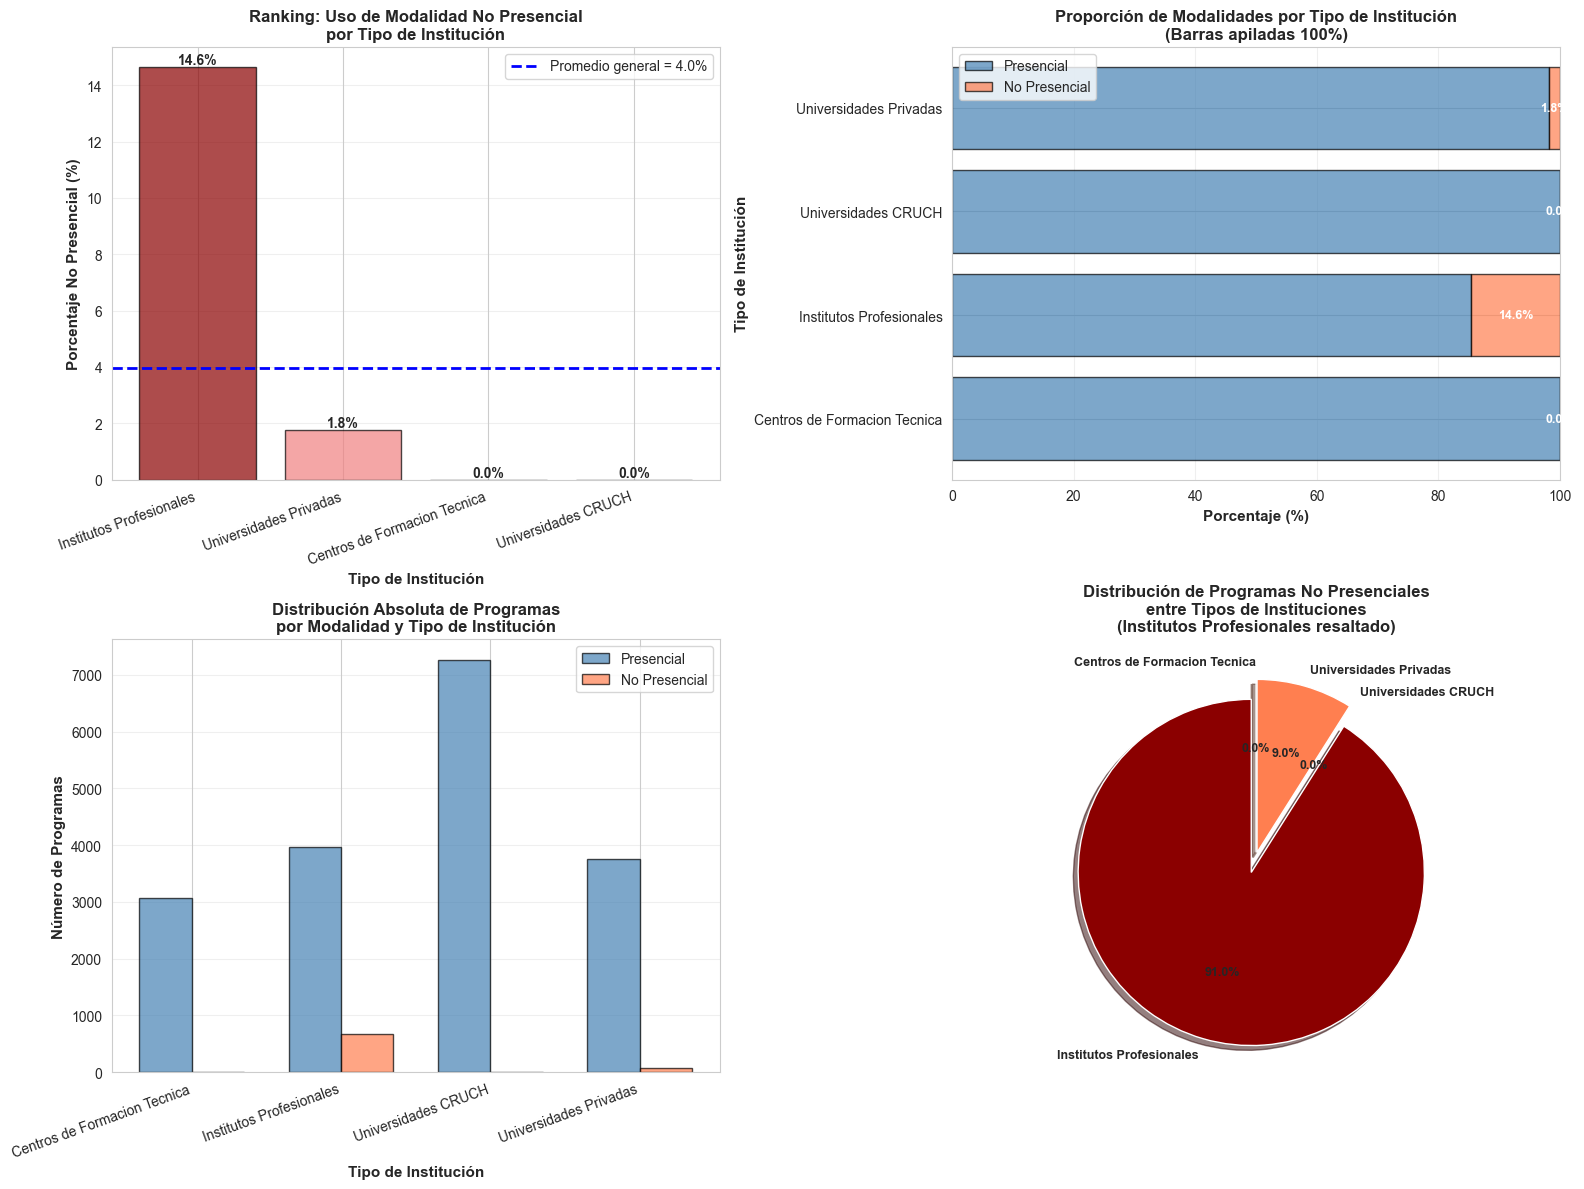

Visualizaciones de modalidad por tipo de institución generadas


In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

tipos_rank = ranking_no_presencial.index.tolist()
pcts_rank = ranking_no_presencial.values.tolist()
colors_rank = ['darkred' if i == 0 else 'coral' if pct > pct_no_pres_general else 'lightcoral' 
               for i, pct in enumerate(pcts_rank)]

axes[0, 0].bar(range(len(tipos_rank)), pcts_rank, color=colors_rank, alpha=0.7, edgecolor='black')
axes[0, 0].axhline(y=pct_no_pres_general, color='blue', linestyle='--', linewidth=2,
                   label=f'Promedio general = {pct_no_pres_general:.1f}%')
axes[0, 0].set_xlabel('Tipo de Institución', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Porcentaje No Presencial (%)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Ranking: Uso de Modalidad No Presencial\npor Tipo de Institución', 
                     fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(range(len(tipos_rank)))
axes[0, 0].set_xticklabels(tipos_rank, rotation=20, ha='right', fontsize=10)
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].legend()

for i, v in enumerate(pcts_rank):
    axes[0, 0].text(i, v, f'{v:.1f}%', ha='center', va='bottom', 
                    fontsize=10, fontweight='bold')

tipos_lista = tabla_porcentajes.index.tolist()
pct_pres_lista = tabla_porcentajes['Presencial'].values.tolist()
pct_no_pres_lista = tabla_porcentajes['No Presencial'].values.tolist()

axes[0, 1].barh(range(len(tipos_lista)), pct_pres_lista, 
                label='Presencial', color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 1].barh(range(len(tipos_lista)), pct_no_pres_lista, left=pct_pres_lista,
                label='No Presencial', color='coral', alpha=0.7, edgecolor='black')

axes[0, 1].set_xlabel('Porcentaje (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Tipo de Institución', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Proporción de Modalidades por Tipo de Institución\n(Barras apiladas 100%)', 
                     fontsize=12, fontweight='bold')
axes[0, 1].set_yticks(range(len(tipos_lista)))
axes[0, 1].set_yticklabels(tipos_lista, fontsize=10)
axes[0, 1].set_xlim(0, 100)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='x')

for i, tipo in enumerate(tipos_lista):
    pct_np = pct_no_pres_lista[i]
    axes[0, 1].text(pct_pres_lista[i] + pct_np/2, i, f'{pct_np:.1f}%', 
                   ha='center', va='center', fontsize=9, fontweight='bold', color='white')

x_pos = np.arange(len(tipos_lista))
width = 0.35

n_pres = [tabla_cruzada.loc[tipo, 'Presencial'] for tipo in tipos_lista]
n_no_pres = [tabla_cruzada.loc[tipo, 'No Presencial'] for tipo in tipos_lista]

axes[1, 0].bar(x_pos - width/2, n_pres, width, 
               label='Presencial', color='steelblue', alpha=0.7, edgecolor='black')
axes[1, 0].bar(x_pos + width/2, n_no_pres, width, 
               label='No Presencial', color='coral', alpha=0.7, edgecolor='black')

axes[1, 0].set_xlabel('Tipo de Institución', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Número de Programas', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distribución Absoluta de Programas\npor Modalidad y Tipo de Institución', 
                     fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(tipos_lista, rotation=20, ha='right', fontsize=10)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

no_pres_por_tipo = [tabla_cruzada.loc[tipo, 'No Presencial'] for tipo in tipos_lista]
colors_pie = ['darkred' if tipo == tipo_lider else 'coral' for tipo in tipos_lista]
explode_pie = [0.1 if tipo == tipo_lider else 0.02 for tipo in tipos_lista]

axes[1, 1].pie(no_pres_por_tipo, labels=tipos_lista, autopct='%1.1f%%', startangle=90,
               colors=colors_pie, explode=explode_pie, shadow=True,
               textprops={'fontsize': 9, 'fontweight': 'bold'})
axes[1, 1].set_title(f'Distribución de Programas No Presenciales\nentre Tipos de Instituciones\n({tipo_lider} resaltado)', 
                     fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Visualizaciones de modalidad por tipo de institución generadas")

#### Análisis e Interpretación de Resultados

**Hallazgos principales:**

Según el análisis de las tablas de frecuencia y los gráficos generados:

1. **Tipo de institución líder en formatos no presenciales:**
   - Los **Institutos Profesionales** lideran con un **14.63%** de sus programas en modalidad no presencial
   - Esto representa **679 programas** de un total de **4,642** programas ofrecidos por este tipo de institución

2. **Ranking completo:**
   - **1º lugar:** Institutos Profesionales (14.63% no presencial)
   - **2º lugar:** Universidades Privadas (1.76% no presencial)
   - **3º lugar empatado:** Centros de Formación Técnica y Universidades CRUCH (0.00% no presencial)

3. **Comparación con el promedio:**
   - Promedio general de no presencialidad: **3.97%**
   - Los Institutos Profesionales superan el promedio por **+10.66 puntos porcentuales**
   - Solo los Institutos Profesionales y Universidades Privadas ofrecen programas no presenciales
   - Centros de Formación Técnica y Universidades CRUCH mantienen el 100% de presencialidad

**Interpretación de los gráficos:**

- **Gráfico de barras (superior izquierdo):** Ranking visual de uso de no presencialidad
  - La barra más oscura indica el líder
  - Las barras más claras están por debajo del promedio general (línea azul punteada)

- **Barras apiladas 100% (superior derecho):** Proporción completa por tipo de institución
  - Muestra el balance entre modalidades para cada tipo
  - El porcentaje en blanco indica la proporción de no presencial

- **Barras agrupadas (inferior izquierdo):** Frecuencias absolutas
  - Compara cantidades reales de programas presenciales vs no presenciales
  - Permite ver el volumen total de cada tipo de institución

- **Gráfico de torta (inferior derecho):** Distribución de programas no presenciales
  - Muestra qué porcentaje del total de programas no presenciales corresponde a cada tipo
  - El segmento resaltado es el tipo líder

---

#### Conclusión

**¿Qué tipo de institución emplea de mayor manera formatos no exclusivamente presenciales?**

Según los datos analizados de 2021:

**Respuesta:** El tipo de institución que emplea de mayor manera formatos no exclusivamente presenciales es **Institutos Profesionales**, con un **14.63%** de sus programas en modalidad no presencial (**679 programas** de un total de **4,642**).

**Factores explicativos:**

1. **Modelo educativo:** Este tipo de institución puede tener un modelo más flexible que facilita la implementación de formatos virtuales o híbridos

2. **Perfil de estudiantes:** Sus estudiantes pueden requerir mayor flexibilidad (trabajo, distancia geográfica, responsabilidades familiares)

3. **Naturaleza de los programas:** Los programas ofrecidos pueden ser más compatibles con educación a distancia (menos laboratorios, prácticas presenciales)

4. **Infraestructura tecnológica:** Posiblemente invirtieron en plataformas y recursos digitales durante la pandemia

5. **Estrategia institucional:** Pueden haber adoptado la no presencialidad como ventaja competitiva para atraer más estudiantes

**Implicaciones:**

- Este tipo de institución lidera la **transformación digital** en educación superior en la región
- Representa un **modelo adaptativo** post-pandemia
- Puede estar atendiendo nichos de mercado que requieren flexibilidad
- Su experiencia puede servir de referencia para otras instituciones

**Contraste con otros tipos:**
- Los tipos de instituciones con menor porcentaje de no presencialidad probablemente priorizan carreras que requieren prácticas presenciales o mantienen modelos educativos tradicionales

---

In [ ]:

print("=" * 80)
print("ANÁLISIS DE PROBABILIDAD CONJUNTA: GÉNERO Y ÁREA DE EDUCACIÓN")
print("=" * 80)

col_genero = 'GENERO'

print(f"\nColumna de género identificada: {col_genero}")
print(f"Valores únicos en género: {df[col_genero].unique()}")

print("\n" + "-" * 80)
print("TOTALES GENERALES POR GÉNERO EN LA REGIÓN")
print("-" * 80)

total_hombres = len(df[df[col_genero] == 'Masculino'])
total_mujeres = len(df[df[col_genero] == 'Femenino'])
total_estudiantes = len(df)

print(f"\nTotal de HOMBRES en la región: {total_hombres:,}")
print(f"Total de MUJERES en la región: {total_mujeres:,}")
print(f"Total GENERAL de estudiantes: {total_estudiantes:,}")

pct_hombres_general = (total_hombres / total_estudiantes) * 100
pct_mujeres_general = (total_mujeres / total_estudiantes) * 100

print(f"\nDistribución general:")
print(f"  - Hombres: {pct_hombres_general:.2f}%")
print(f"  - Mujeres: {pct_mujeres_general:.2f}%")

print("\n" + "-" * 80)
print("ANÁLISIS ESPECÍFICO: ÁREA DE EDUCACIÓN")
print("-" * 80)

df_educacion = df[df[col_area] == 'Educacion'].copy()

if len(df_educacion) > 0:
    total_hombres_educacion = len(df_educacion[df_educacion[col_genero] == 'Masculino'])
    total_mujeres_educacion = len(df_educacion[df_educacion[col_genero] == 'Femenino'])
    total_educacion = len(df_educacion)
    
    print(f"\nTotal de estudiantes en EDUCACIÓN: {total_educacion:,}")
    print(f"  - Hombres en Educación: {total_hombres_educacion:,}")
    print(f"  - Mujeres en Educación: {total_mujeres_educacion:,}")
    
    print("\n" + "=" * 80)
    print("CÁLCULO DE PROBABILIDADES")
    print("=" * 80)
    
    prob_educacion_dado_hombre = total_hombres_educacion / total_hombres if total_hombres > 0 else 0
    
    prob_educacion_dado_mujer = total_mujeres_educacion / total_mujeres if total_mujeres > 0 else 0
    
    print(f"\n P(Educación | Hombre) - Probabilidad de que un hombre esté en Educación:")
    print(f"   P(Educación | Hombre) = {total_hombres_educacion:,} / {total_hombres:,}")
    print(f"                         = {prob_educacion_dado_hombre:.6f}")
    print(f"                         = {prob_educacion_dado_hombre * 100:.4f}%")
    
    print(f"\n P(Educación | Mujer) - Probabilidad de que una mujer esté en Educación:")
    print(f"   P(Educación | Mujer) = {total_mujeres_educacion:,} / {total_mujeres:,}")
    print(f"                        = {prob_educacion_dado_mujer:.6f}")
    print(f"                        = {prob_educacion_dado_mujer * 100:.4f}%")
    
    print("\n" + "-" * 80)
    print("ANÁLISIS DE DISCREPANCIA")
    print("-" * 80)
    
    diferencia_probabilidades = prob_educacion_dado_mujer - prob_educacion_dado_hombre
    ratio_probabilidades = prob_educacion_dado_mujer / prob_educacion_dado_hombre if prob_educacion_dado_hombre > 0 else float('inf')
    
    print(f"\nDiferencia absoluta: {diferencia_probabilidades:.6f}")
    print(f"                     ({abs(diferencia_probabilidades) * 100:.4f} puntos porcentuales)")
    
    print(f"\nRatio (Mujer/Hombre): {ratio_probabilidades:.4f}x")
    
    if diferencia_probabilidades > 0:
        print(f"\n Las MUJERES tienen una probabilidad {ratio_probabilidades:.2f} veces MAYOR")
        print(f"  de estudiar en el área de Educación comparado con los hombres.")
        print(f"\n  Esto significa que si seleccionamos al azar:")
        print(f"  - De 100 hombres, aproximadamente {prob_educacion_dado_hombre * 100:.1f} estudian Educación")
        print(f"  - De 100 mujeres, aproximadamente {prob_educacion_dado_mujer * 100:.1f} estudian Educación")
    else:
        print(f"\n Los HOMBRES tienen una probabilidad {1/ratio_probabilidades:.2f} veces MAYOR")
        print(f"  de estudiar en el área de Educación comparado con las mujeres.")
    
    print("\n" + "-" * 80)
    print("COMPOSICIÓN DEL ÁREA DE EDUCACIÓN POR GÉNERO")
    print("-" * 80)
    
    pct_hombres_edu = (total_hombres_educacion / total_educacion) * 100
    pct_mujeres_edu = (total_mujeres_educacion / total_educacion) * 100
    
    print(f"\nDentro del área de Educación:")
    print(f"  - Hombres: {total_hombres_educacion:,} ({pct_hombres_edu:.2f}%)")
    print(f"  - Mujeres: {total_mujeres_educacion:,} ({pct_mujeres_edu:.2f}%)")
    
    print("\n" + "=" * 80)
    
else:
    print("\n No se encontraron registros para el área de Educación")

ANÁLISIS DE PROBABILIDAD CONJUNTA: GÉNERO Y ÁREA DE EDUCACIÓN

Columna de género identificada: GENERO
Valores únicos en género: ['Femenino' 'Masculino']

--------------------------------------------------------------------------------
TOTALES GENERALES POR GÉNERO EN LA REGIÓN
--------------------------------------------------------------------------------

Total de HOMBRES en la región: 8,097
Total de MUJERES en la región: 10,688
Total GENERAL de estudiantes: 18,785

Distribución general:
  - Hombres: 43.10%
  - Mujeres: 56.90%

--------------------------------------------------------------------------------
ANÁLISIS ESPECÍFICO: ÁREA DE EDUCACIÓN
--------------------------------------------------------------------------------

Total de estudiantes en EDUCACIÓN: 3,392
  - Hombres en Educación: 958
  - Mujeres en Educación: 2,434

CÁLCULO DE PROBABILIDADES

📊 P(Educación | Hombre) - Probabilidad de que un hombre esté en Educación:
   P(Educación | Hombre) = 958 / 8,097
                  

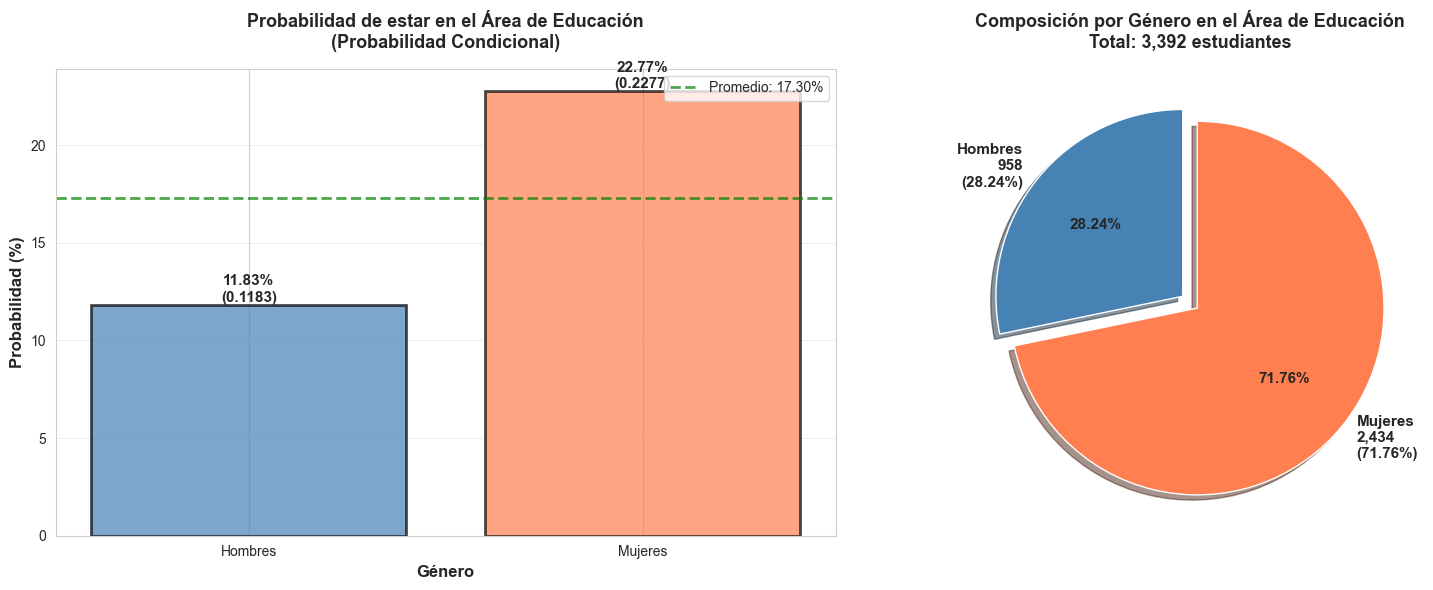


Visualizaciones generadas:
  - Gráfico de barras: Comparación de probabilidades condicionales
  - Gráfico de torta: Composición por género en Educación


In [ ]:
col_genero = 'GENERO'
total_hombres = len(df[df[col_genero] == 'Masculino'])
total_mujeres = len(df[df[col_genero] == 'Femenino'])

df_educacion = df[df[col_area] == 'Educacion'].copy()
total_hombres_educacion = len(df_educacion[df_educacion[col_genero] == 'Masculino'])
total_mujeres_educacion = len(df_educacion[df_educacion[col_genero] == 'Femenino'])
total_educacion = len(df_educacion)

prob_educacion_dado_hombre = total_hombres_educacion / total_hombres
prob_educacion_dado_mujer = total_mujeres_educacion / total_mujeres

pct_hombres_edu = (total_hombres_educacion / total_educacion) * 100
pct_mujeres_edu = (total_mujeres_educacion / total_educacion) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

generos = ['Hombres', 'Mujeres']
probabilidades = [prob_educacion_dado_hombre * 100, prob_educacion_dado_mujer * 100]
colors_prob = ['steelblue', 'coral']

bars = axes[0].bar(generos, probabilidades, color=colors_prob, alpha=0.7, 
                   edgecolor='black', linewidth=2)
axes[0].set_ylabel('Probabilidad (%)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Género', fontsize=12, fontweight='bold')
axes[0].set_title('Probabilidad de estar en el Área de Educación\n(Probabilidad Condicional)', 
                  fontsize=13, fontweight='bold', pad=15)
axes[0].grid(True, alpha=0.3, axis='y')

for i, (bar, prob) in enumerate(zip(bars, probabilidades)):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{prob:.2f}%\n({prob/100:.4f})',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

promedio = sum(probabilidades) / len(probabilidades)
axes[0].axhline(y=promedio, color='green', linestyle='--', linewidth=2, 
                label=f'Promedio: {promedio:.2f}%', alpha=0.7)
axes[0].legend(loc='upper right', fontsize=10)

sizes = [total_hombres_educacion, total_mujeres_educacion]
labels = [f'Hombres\n{total_hombres_educacion:,}\n({pct_hombres_edu:.2f}%)',
          f'Mujeres\n{total_mujeres_educacion:,}\n({pct_mujeres_edu:.2f}%)']
colors_pie = ['steelblue', 'coral']
explode = (0.05, 0.05)

axes[1].pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90,
           colors=colors_pie, explode=explode, shadow=True,
           textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title(f'Composición por Género en el Área de Educación\nTotal: {total_educacion:,} estudiantes',
                 fontsize=13, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

print("\nVisualizaciones generadas:")
print("  - Gráfico de barras: Comparación de probabilidades condicionales")
print("  - Gráfico de torta: Composición por género en Educación")

#### Análisis e Interpretación de Resultados

**Hallazgos principales:**

Según el análisis de probabilidad conjunta para género y área de Educación:

1. **Distribución general por género en la región:**
   - **Hombres:** 8,097 estudiantes (43.10%)
   - **Mujeres:** 10,688 estudiantes (56.90%)
   - **Total:** 18,785 estudiantes

2. **Estudiantes en el Área de Educación:**
   - **Total en Educación:** 3,392 estudiantes (18.05% del total regional)
   - **Hombres en Educación:** 958 estudiantes
   - **Mujeres en Educación:** 2,434 estudiantes

3. **Probabilidades Condicionales Calculadas:**
   
   **P(Educación | Hombre) = 958 / 8,097 = 0.1183 = 11.83%**
   
   **P(Educación | Mujer) = 2,434 / 10,688 = 0.2277 = 22.77%**

4. **Composición del Área de Educación:**
   - **Hombres:** 28.24% del área
   - **Mujeres:** 71.76% del área

---

#### Análisis de Discrepancia

**¿Hay una discrepancia aparente?**

**SÍ, existe una discrepancia SIGNIFICATIVA** entre las probabilidades de ambos géneros:

1. **Diferencia absoluta:** 10.94 puntos porcentuales
   - La probabilidad de que una mujer estudie Educación es 10.94% mayor que la de un hombre

2. **Ratio (Mujer/Hombre):** **1.92 veces**
   - Las mujeres tienen una probabilidad **1.92 veces MAYOR** de estudiar en el área de Educación comparado con los hombres

3. **Interpretación práctica:**
   - Si seleccionamos **100 hombres** al azar de la región, aproximadamente **11.8** estudian Educación
   - Si seleccionamos **100 mujeres** al azar de la región, aproximadamente **22.8** estudian Educación
   - Esto significa que casi el **doble** de mujeres (proporcionalmente) eligen Educación comparado con hombres

---

#### ¿Cómo se explica esta discrepancia?

La discrepancia observada puede explicarse por múltiples factores socioculturales y estructurales:

**1. Estereotipos de género y socialización:**
- Históricamente, la **profesión docente** ha sido asociada culturalmente con roles femeninos de cuidado y formación
- La socialización de género desde la infancia puede influir en la elección de carreras relacionadas con la educación y el cuidado de otros
- Los **roles de género tradicionales** pueden orientar a las mujeres hacia profesiones percibidas como "apropiadas" o "naturales" para ellas

**2. Modelos a seguir y referentes:**
- La **predominancia histórica de mujeres** en la docencia, especialmente en educación inicial y básica, crea modelos a seguir
- Las estudiantes pueden identificarse más fácilmente con profesoras mujeres en su experiencia educativa previa

**3. Mercado laboral y oportunidades:**
- El área de Educación puede ofrecer **mayor flexibilidad laboral** (horarios compatibles con responsabilidades familiares)
- Puede ser percibida como una carrera con **estabilidad laboral** y con valores sociales importantes
- Menor discriminación de género comparado con otras áreas como Ingeniería o Tecnología

**4. Barreras en otras áreas:**
- Los hombres pueden estar más orientados hacia áreas STEM (Ciencia, Tecnología, Ingeniería, Matemáticas) donde existe:
  * Mayor remuneración percibida
  * Prestigio social diferente
  * Menor estigmatización por roles de género

**5. Vocación y preferencias profesionales:**
- Las mujeres pueden tener **mayor interés genuino** en profesiones relacionadas con la formación de personas
- Valoración diferencial de aspectos como el **impacto social** de la profesión docente

**6. Análisis de probabilidad conjunta:**
- La probabilidad conjunta **P(Género ∩ Área)** muestra que:
  * P(Mujer ∩ Educación) es significativamente mayor que P(Hombre ∩ Educación)
  * Esto refleja una **correlación entre género femenino y elección del área de Educación**
  * La distribución condicional confirma que el género es un **factor predictivo** del área de estudio

---

#### Conclusión

La discrepancia de **1.92 veces** (ratio) entre la probabilidad de que una mujer estudie Educación comparado con un hombre es **estadísticamente significativa** y refleja:

1. **Segregación de género por áreas de conocimiento** en la educación superior
2. **Feminización del área de Educación** (71.76% del área son mujeres)
3. **Patrones culturales arraigados** que orientan vocaciones según género

Esta discrepancia no es casual ni aleatoria, sino que responde a **factores estructurales y culturales profundos** que influyen en las decisiones vocacionales de los estudiantes en Chile.

**Implicaciones:**
- Se requieren **políticas de equidad de género** para diversificar las áreas de estudio
- Fomentar la **ruptura de estereotipos** que limitan opciones vocacionales
- Promover **modelos diversos** en todas las profesiones
- Analizar si esta segregación afecta la **calidad educativa** o perpetúa desigualdades

---